# MSDS 7331 - Mini Lab: Logistic Regression and SVMs

### Investigators
- [Matt Baldree](mailto:mbaldree@smu.edu?subject=mini-lab)
- [Tom Elkins](telkins@smu.edu?subject=mini-lab)
- [Austin Kelly](ajkelly@smu.edu?subject=mini-lab)
- [Murali Parthasarathy](mparthasarathy@smu.edu?subject=mini-lab)


<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:5px;'>
    <h3>Lab Instructions</h3>
    <p>You are to perform predictive analysis (classification) upon a data set: model the dataset using methods we have discussed in class: logistic regression and support vector machines, and making conclusions from the analysis. Follow the CRISP-DM framework in your analysis (you are not performing all of the CRISP-DM outline, only the portions relevant to the grading rubric outlined below). This report is worth 10% of the final grade. You may complete this assignment in teams of as many as three people.
Write a report covering all the steps of the project. The format of the document can be PDF, *.ipynb, or HTML. You can write the report in whatever format you like, but it is easiest to turn in the rendered iPython notebook. The results should be reproducible using your report. Please carefully describe every assumption and every step in your report.</p>
</div>

## 1 - Background
We continue our data science work on the 2015 Washington, D.C. Metro Crime data as refined in Lab 1. This dataset contains crime data specified as "OFFENSE". An offense code was established for each offense and the offense were grouped into a binary classification of property or violent crime. The number used for the code does not imply a level of severity they were simply applied in order of appearance). The table below provides a mapping of the textual offense to its code and type of crime.

|Offense|Offense_Code|Crime_Type|
|:------|:----------:|---------:|
|Theft/Other|1|2 (Property)|
|Theft from Auto|2|2 (Property)|
|Burglary|3|2 (Property)|
|Assault with Dangerous Weapon|4|1 (Violent)|
|Robbery|5|1 (Violent)|
|Motor Vehicle Theft|6|2 (Property)|
|Homicide|7|1 (Violent)|
|Sex Abuse|8|1 (Violent)|
|Arson|9|2 (Property)|

The dataset also contains a variety of geographic identifiers representing different political, social, and legal boundaries.

- DISTRICT -- the Police district within which the crime was committed
- Police Service Area (PSA) -- A subordinate area within a District
- Ward -- A political area, similar to a "county" in a larger state
- Advisory Neighborhood Committed (ANC) -- A social group consisting of neighbors and social leaders in a small geographic area
- Voting Precinct -- A political area for the management of voting residents
- Local Coordinates (XBLOCK and YBLOCK) -- location within the DC metro area based on the Maryland mapping system
- Global Coordinates (Latitude and Longitude) -- location on the planet

The dataset also contains time-based identifiers.
- The Start and End dates/times of when the crime *might* have been committed.
- The date/time the crime was reported (i.e. when the police responded and took the report)
- Shift - the police duty shift that responded to the crime (broken into 8-hour periods within a day)

### 1.1 - Dataset Review
We continue to use our dataset selected for lab 1 - the 2015 Washington, D.C. Metro Crime data.  That dataset contained the type of crime committed (Field name "OFFENSE"; from which we derived an "Offense_Code" field and ascribed a numeric value for each offense type (NOTE: The number used does not imply a level of severity they were simply applied in order of appearance).  :

|Offense|Offense_Code|Crime_Type|
|:------|:----------:|---------:|
|Theft/Other|1|2 (Property)|
|Theft from Auto|2|2 (Property)|
|Burglary|3|2 (Property)|
|Assault with Dangerous Weapon|4|1 (Violent)|
|Robbery|5|1 (Violent)|
|Motor Vehicle Theft|6|2 (Property)|
|Homicide|7|1 (Violent)|
|Sex Abuse|8|1 (Violent)|
|Arson|9|2 (Property)|

The dataset contains a variety of geographic identifiers representing different political, social, and legal boundaries.

DISTRICT -- the Police district within which the crime was committed<br>
Police Service Area (PSA) -- A subordinate area within a District<br>
Ward -- A political area, similar to a "county" in a larger state<br>
Advisory Neighborhood Committed (ANC) -- A social group consisting of neighbors and social leaders in a small geographic area<br>
Voting Precinct -- A political area for the management of voting residents<br>
Local Coordinates (XBLOCK and YBLOCK) -- location within the DC metro area based on the Maryland mapping system<br>
Global Coordinates (Latitude and Longitude) -- location on the planet<br>

There are also time-based identifiers provided in the data
* The Start and End dates/times of when the crime *might* have been committed.
* The date/time the crime was reported (i.e. when the police responded and took the report)
* These can be further decomposed to Seasons, Months, Weeks, Day of the Week, etc.
* Shift - the police duty shift that responded to the crime (broken into 8-hour periods within a day)

From these time-based data we could associate environmental conditions as well, including temperatures, rainfall, phase of the moon, etc.

These features give us a variety of ways to attempt to classify the data.

### 1.2 - Classification Tasks
We decided to take a look at two different classification processes with our data set.

#### 1.2.1 - Crime_Type (Violent/Property)
The second classification task is a binary classification, in which we attempt to build a model to predict whether the crime will be against a person (violent) or against property. Again, the goal is to help the Police manage resources more appropriately.

#### 1.2.2 - Offense/Offense_Code
For the first classification task, we chose to attempt building a model to predict the type of offense given the other features of the data (geographic location, time of day, political area, etc.).  The hope is that if a type of crime could be predicted, then the Police would be better able to allocate offense-specific resources appropriately.

#### 1.2.3 - Model Comparison
Secondarily, we seek to compare the accuracy of the models - i.e. if the Crime_Type prediction indicates a "Violent" crime, does the Offense prediction agree (Homicide, Sex Abuse, Robbery, or Assault).


# 2 - Predictive Analysis Goal
This mini-lab will predict a classification for the OFFENSE code and CRIME_TYPE given a set of features. Two classification models will be used to perform this classification - 1) logistic regression and 2) support vector machine (SVM). Parameters for these algorithms will be adjusted to determine the setting that yields the most accurate results. 

### Crime_Type (Violent/Property)
The first classification task is a binary classification, in which we attempt to build a model to predict whether the crime will be against a person (violent) or against property given the other features of the data (geographic location, time of day, political area, etc.). The goal is to help the Police manage resources more appropriately.

### Offense/Offense_Code
For the second classification task, we chose to attempt building a model to predict the type of offense (theft, homicide, assault, arson, etc.).  The hope is that if a type of crime could be predicted, then the Police would be better able to allocate offense-specific resources appropriately.

### Model Comparison
Secondarily, we seek to compare the accuracy of the models - i.e. if the Crime_Type prediction indicates a "Violent" crime, does the Offense prediction agree (Homicide, Sex Abuse, Robbery, or Assault).

<a id='data_prep'></a>
## 2.1 - Data Preparation

In [38]:
#1.0.1 - Import the libraries we will need
import pandas as pd
import numpy as np
import math
import statsmodels.api as sm

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(font_scale=2)
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

# Read in the crime data from the Lab 1 CSV file
dc = pd.read_csv('data/DC_Crime_2015_Lab1.csv')

### *** TO DO:
###  * Incorporate a feature for the weather conditions during START_DATE and END_DATE so we can use rainfall/max temp/min temp in the regression
dc['REPORT_DAT'] = pd.to_datetime(dc['REPORT_DAT'])
dc=dc.rename(columns = {'REPORT_DAT':'REPORT_DATE'})
dc['START_DATE'] = pd.to_datetime(dc['START_DATE'])
dc['END_DATE'] = pd.to_datetime(dc['END_DATE'])
dc['XBLOCK'] = dc['XBLOCK'].astype(np.float64)
dc['YBLOCK'] = dc['YBLOCK'].astype(np.float64)
dc['Crime_Month'] = dc["END_DATE"].map(lambda x: x.month)
dc['Crime_WeekDay'] = dc["END_DATE"].map(lambda x:x.dayofweek)
dc['Crime_Weekend'] = dc["Crime_WeekDay"] >= 5
dc['Crime_Weekend'] = dc['Crime_Weekend'].astype(np.int64)

dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36489 entries, 0 to 36488
Data columns (total 29 columns):
REPORT_DATE             36489 non-null datetime64[ns]
SHIFT                   36489 non-null object
OFFENSE                 36489 non-null object
METHOD                  36489 non-null object
DISTRICT                36442 non-null float64
PSA                     36441 non-null float64
WARD                    36489 non-null int64
ANC                     36489 non-null int64
NEIGHBORHOOD_CLUSTER    36489 non-null int64
CENSUS_TRACT            36489 non-null int64
VOTING_PRECINCT         36489 non-null int64
CCN                     36489 non-null int64
XBLOCK                  36489 non-null float64
YBLOCK                  36489 non-null float64
START_DATE              36489 non-null datetime64[ns]
END_DATE                36489 non-null datetime64[ns]
PSA_ID                  36489 non-null int64
DistrictID              36489 non-null int64
SHIFT_Code              36489 non-null int6

In [39]:
print "---==< Crime Type vs Weekend >==---"
print pd.crosstab(dc.CRIME_TYPE, dc.Crime_Weekend)
print "---==< Crime Type vs Day of week >==---"
print pd.crosstab(dc.CRIME_TYPE, dc.Crime_WeekDay)
print "---==< Crime Type vs Month >==---"
print pd.crosstab(dc.CRIME_TYPE, dc.Crime_Month)
print "---==< Crime Type vs Shift >==---"
print pd.crosstab(dc.CRIME_TYPE, dc.SHIFT)
print "---==< Crime Type vs District >==---"
print pd.crosstab(dc.CRIME_TYPE, dc.DistrictID)
print "---==< Crime Type vs PSA >==---"
print pd.crosstab(dc.CRIME_TYPE, dc.PSA_ID)
print "---==< Crime Type vs Ward >==---"
print pd.crosstab(dc.CRIME_TYPE, dc.WARD)
print "---==< Crime Type vs ANC >==---"
print pd.crosstab(dc.CRIME_TYPE, dc.ANC)
print "---==< Crime Type vs Neighborhood >==---"
print pd.crosstab(dc.CRIME_TYPE, dc.NEIGHBORHOOD_CLUSTER)
print "---==< Crime Type vs Tract >==---"
print pd.crosstab(dc.CRIME_TYPE, dc.CENSUS_TRACT)
print "---==< Crime Type vs Precinct >==---"
print pd.crosstab(dc.CRIME_TYPE, dc.VOTING_PRECINCT)
print "---==< Crime Type vs Latitude >==---"
print pd.crosstab(dc.CRIME_TYPE, dc.Latitude)
print "---==< Crime Type vs Longitude >==---"
print pd.crosstab(dc.CRIME_TYPE, dc.Longitude)


---==< Crime Type vs Weekend >==---
Crime_Weekend      0     1
CRIME_TYPE                
1               4202  1971
2              21843  8473
---==< Crime Type vs Day of week >==---
Crime_WeekDay     0     1     2     3     4     5     6
CRIME_TYPE                                             
1               823   839   860   856   824  1000   971
2              4478  4270  4359  4172  4564  4350  4123
---==< Crime Type vs Month >==---
Crime_Month    1     2     3     4     5     6     7     8     9     10    11  \
CRIME_TYPE                                                                      
1             438   281   456   509   552   536   642   564   520   589   514   
2            2442  1592  2028  2426  2819  2875  3010  2903  2558  2630  2444   

Crime_Month    12  
CRIME_TYPE         
1             572  
2            2589  
---==< Crime Type vs Shift >==---
SHIFT         DAY  EVENING  MIDNIGHT
CRIME_TYPE                          
1            1244     2566      2363
2       

<a id="model_building"></a>
## 3 - Model Building

<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
<h3>SVM and Logistic Regression Modeling</h3>
    <ol><li>[<b>50 points</b>] Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. Assess how well each model performs (use 80/20 training/testing split for your data). Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use.</li>
    <li>[<b>10 points</b>]  Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail.</li>
    <li>[<b>30 points</b>] Use the weights from logistic regression to interpret the importance of different features for each classification task. Explain your interpretation in detail. Why do you think some variables are more important?</li>
    <li>[<b>10 points</b>]  Look at the chosen support vectors for the classification task. Do these provide
any insight into the data? Explain.</li>
</ol>
</div>

### 3.1 - Logistic Regression Model for Crime_Type (Rubric Item 1)

In [40]:
# 3.1.1 Dataset creation

#  The field "CRIME_TYPE" exists as 1 = Violent, and 2 = Property.  
#  We subtract from 2 to make it 1 = Violent, and 0 = Property
LRM_Response = 2 - dc["CRIME_TYPE"]
#print LRM_Response

def RateModel(modelScore,meanResponse):
    print
    print "---==< Logistic Regression Results >==---"
    print
    print "Mean response for this data set is ", meanResponse
    print
    print "Model accuracy against this data set is ", modelScore
    print
    
    guessRate = 1.0 - meanResponse
    print "If we simply guessed 'Property' crime all the time, our accuracy would be ", guessRate
    print
    
    if modelScore > guessRate:
        print "The model predictions are better than simply guessing"
    elif modelScore == guessRate:
        print "The model predictions are the same as guessing"
    else:
        print "The model predictions are worse than simply guessing"
  

In [41]:
# 3.1.2 Model

#  Set up model using all location and time features
LRM_Features = dc[["PSA_ID","ANC","NEIGHBORHOOD_CLUSTER","CENSUS_TRACT","VOTING_PRECINCT","SHIFT_Code","Latitude","Longitude","Crime_Month","Crime_WeekDay","Crime_Weekend"]]
#print LRM_Features

#  Fit our model
LRM_Model = LogisticRegression()
LRM_Model.fit(LRM_Features, LRM_Response)

Predictions = LRM_Model.predict(LRM_Features)

#  How accurate is it?
Model_Acc = metrics.accuracy_score(LRM_Response,Predictions)
Model_Conf = metrics.confusion_matrix(LRM_Response,Predictions)
print Model_Conf
RateModel(Model_Acc,LRM_Response.mean())

[[29830   486]
 [ 5714   459]]

---==< Logistic Regression Results >==---

Mean response for this data set is  0.169174271698

Model accuracy against this data set is  0.830085779276

If we simply guessed 'Property' crime all the time, our accuracy would be  0.830825728302

The model predictions are worse than simply guessing


So - that was disappointing.  Let's see if the coefficients tell us anything

                       0                     1
0                 PSA_ID    [0.00167281742196]
1                    ANC     [0.0110371441361]
2   NEIGHBORHOOD_CLUSTER    [-0.0025635134189]
3           CENSUS_TRACT  [-1.48020338719e-05]
4        VOTING_PRECINCT    [0.00136857636899]
5             SHIFT_Code      [0.802727803558]
6               Latitude    [-0.0183006205069]
7              Longitude     [0.0485000031347]
8            Crime_Month    [0.00742452609029]
9          Crime_WeekDay     [0.0101210231365]
10         Crime_Weekend     [0.0350702378723]


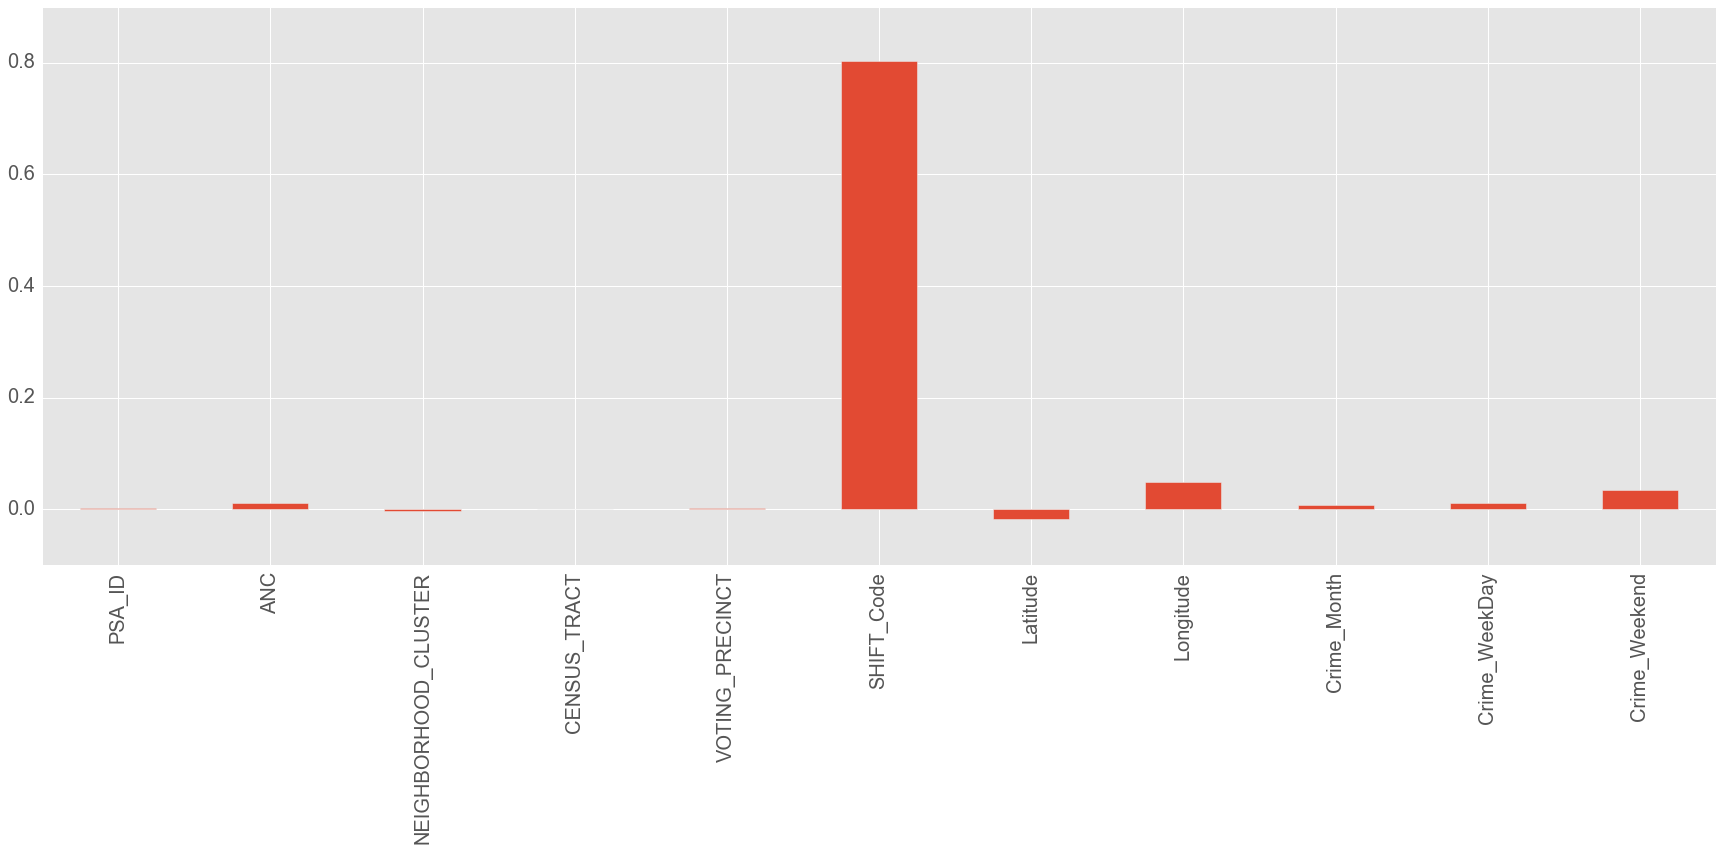

In [42]:
#3.1.3 Coefficients
#  Display the coefficients to see if they tell us anything
print pd.DataFrame(zip(LRM_Features.columns, np.transpose(LRM_Model.coef_)))

plt.figure(figsize=(30,10))
plt.style.use('ggplot')
weights = pd.Series(LRM_Model.coef_[0],index=LRM_Features.columns)
weights.plot(kind='bar')
plt.show()

* The SHIFT has the biggest impact (0.80) [by over an order of magnitude compared to all other features].  Each SHIFT value represents an 8-hour period in the day.
  * This suggests we should look at decreasing the period of time to smaller than 8 hours
* Longitude has the second-largest impact (0.0485).  The fact that it is positive implies that the odds of being a victim of a violent crime increases as we travel east (because longitude values in the western hemisphere are negative), holding all other factors constant.
* Weekends have the third-largest impact (0.035).
* Latitude has the fourth-largest impact (-0.018), implying that the odds of being a victim of a violent crime increases as we travel south.

The factors with the smallest magnitude coefficients were all location based:
* CENSUS_TRACT = 0 (effectively)
* VOTING_PRECINCT = 0.0013
* Police Service Area = 0.0016 (I believe this implies that the Police are equally effective in all of their service areas)
* NEIGHBOORHOOD_CLUSTER = -0.0026

This points to removing some of the location factors, and increasing the resolution in time factors to less than 8-hour periods.

Ah - but first we need to normalize the factors to get a better feel for their impacts

[[5945   56]
 [1208   89]]

---==< Logistic Regression Results >==---

Mean response for this data set is  0.177719923267

Model accuracy against this data set is  0.826801863524

If we simply guessed 'Property' crime all the time, our accuracy would be  0.822280076733

The model predictions are better than simply guessing

---==< Coefficients in descending order of magnitude >==---
                  Factor         Coefficient
5             SHIFT_Code    [0.579225987645]
0                 PSA_ID    [0.284614206836]
1                    ANC    [0.223216833542]
7              Longitude    [0.190247018239]
3           CENSUS_TRACT   [-0.105946997593]
2   NEIGHBORHOOD_CLUSTER  [-0.0776911449924]
8            Crime_Month    [0.036498631728]
6               Latitude   [-0.035379293964]
10         Crime_Weekend   [0.0223786593569]
9          Crime_WeekDay   [0.0223136565755]
4        VOTING_PRECINCT   [0.0201762545948]


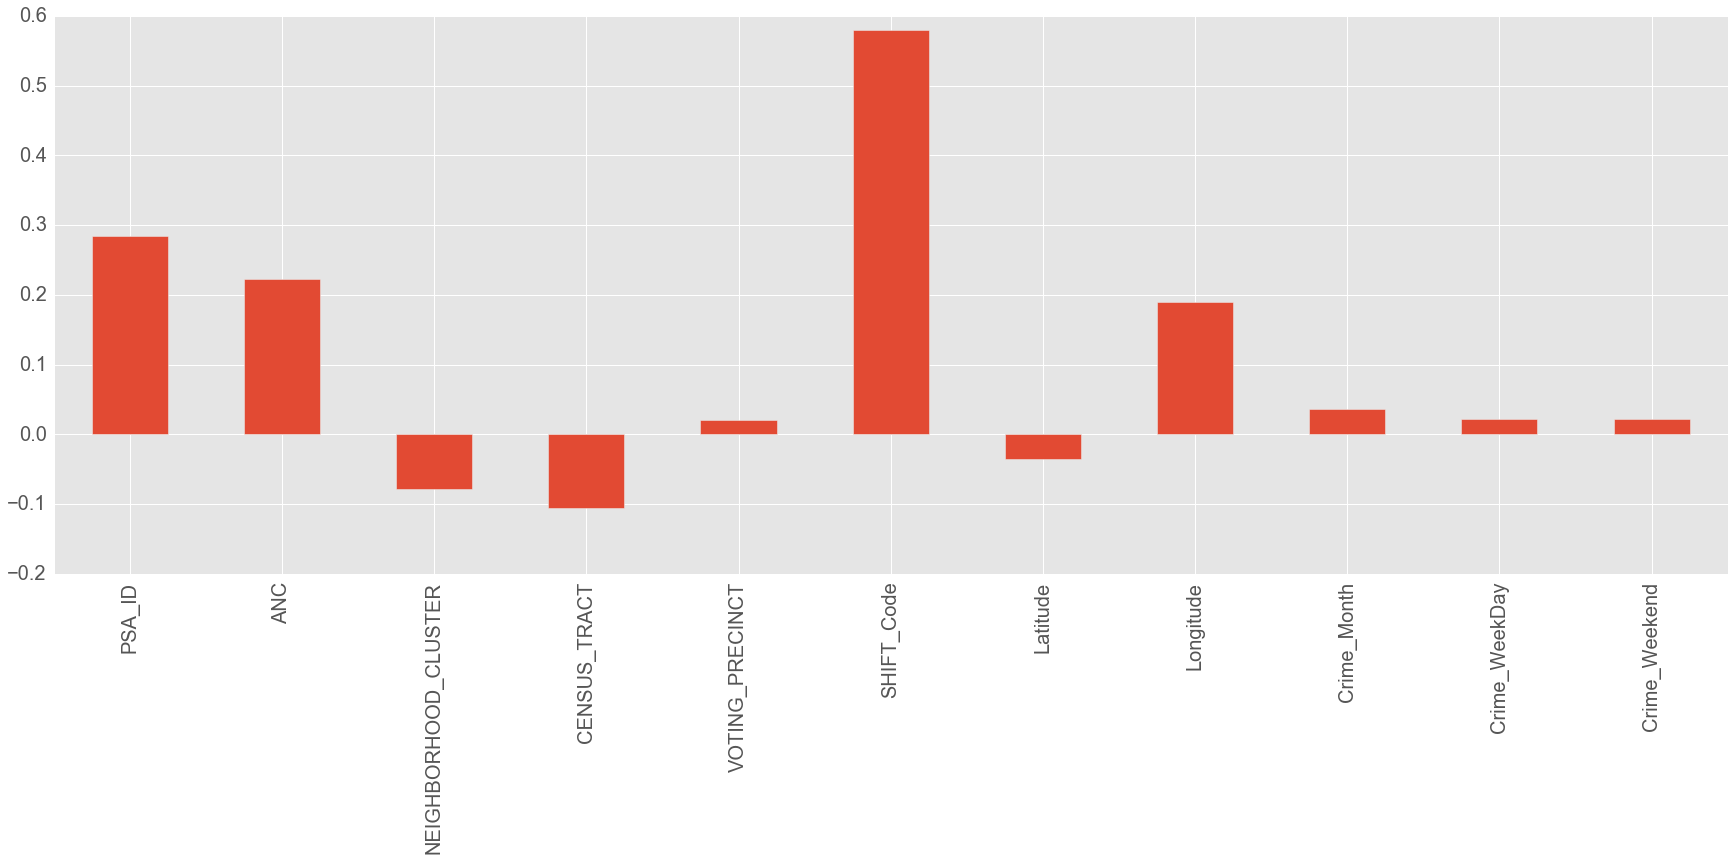

In [43]:
#3.1.4 - Split into training and test sets (80/20)
LRM_XTrain, LRM_XTest, LRM_YTrain, LRM_YTest = train_test_split(LRM_Features, LRM_Response, test_size=0.2, random_state=0)

#3.1.5 - Feature normalization  (From class notebook #4)
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
Scaler.fit(LRM_XTrain)

# Now we transform our data based on the scaler
Scaled_XTrain = Scaler.transform(LRM_XTrain)
Scaled_XTest = Scaler.transform(LRM_XTest)

# Fit the model against the scaled training data
LRM_Model.fit(Scaled_XTrain,LRM_YTrain)

# Generate predictions on the test set
Predictions2 = LRM_Model.predict(Scaled_XTest)

Model_Acc2 = metrics.accuracy_score(LRM_YTest,Predictions2)
Model_Conf2 = metrics.confusion_matrix(LRM_YTest,Predictions2)
print Model_Conf2
RateModel(Model_Acc2,LRM_YTest.mean())

pd.DataFrame(zip(LRM_Features.columns, np.transpose(LRM_Model.coef_)))
coefs = pd.DataFrame(zip(LRM_Features.columns, np.transpose(LRM_Model.coef_)), columns=['Factor','Coefficient'])
print
print "---==< Coefficients in descending order of magnitude >==---"
print coefs.reindex(coefs.Coefficient.abs().sort_values(ascending=False).index)

plt.figure(figsize=(30,10))
plt.style.use('ggplot')
weights = pd.Series(LRM_Model.coef_[0],index=LRM_Features.columns)
weights.plot(kind='bar')
plt.show()


Now, with normalized coefficients, we see that:

* The SHIFT still has the biggest impact (0.58), but not as much as it had unscaled.  Each SHIFT value represents an 8-hour period in the day.
  * This still suggests we should look at decreasing the period of time to smaller than 8 hours
* Day of the week, Weekends, and Month have dropped in impact, and location-based factors have increased in importance
* Police Service Areas have the second-largest impact (0.28).
* Advisory Neighborhood Commissions have the third-largest impact.

**Other trends of note**:
* Longitude still has a substantial coefficient, implying that one's location is still important.
* One's odds of being the victim of a violent crime is greater on the weekends than during the week (holding all other factors constant).
* The day of the week has a positive coefficient, implying that one's odds of being the victim of a violent crime increases as the week progresses [Weekdays are numbered 0=Monday ... 6=Sunday] (holding all other factors constant). This coincides with the odds increasing on the weekends versus a weekday.

**Cautions**:
* Shift, PSA, ANC, and Day of the week are categorical, not ordinal, so we need to one-hot encode these features to get more resolution on *how* they impact the odds of being a victim of violent crime.
* This will **drastically** increase the number of explanatory variables.

In [44]:
#3.1.6 Feature adjustments

#  Extract the hour of the day from the END_DATE field.  Use this instead of SHIFT to get better resolution
dc['Crime_Hour'] = dc["END_DATE"].map(lambda x:x.hour)
tmp_df = pd.get_dummies(dc.Crime_Hour,prefix="Hour")
dc_expanded = pd.concat((dc,tmp_df),axis=1)

#  Create fields for each Police Service Area (correlated with District)
tmp_df = pd.get_dummies(dc.PSA_ID,prefix='PSA')
dc_expanded = pd.concat((dc_expanded,tmp_df),axis=1)

#  Create fields for each Association Neighborhood Commission (correlated with Ward)
tmp_df = pd.get_dummies(dc.ANC,prefix='ANC')
dc_expanded = pd.concat((dc_expanded,tmp_df),axis=1)

#  Create fields for each Month (to give us seasonal/monthly insights)
tmp_df = pd.get_dummies(dc.Crime_Month,prefix='Month')
dc_expanded = pd.concat((dc_expanded,tmp_df),axis=1)


#2.1.7 - Remove unnecessary columns
if 'REPORT_DATE' in dc_expanded:
    del dc_expanded['REPORT_DATE']  #  Too specific for use
if 'SHIFT' in dc_expanded:
    del dc_expanded['SHIFT']   #  The Crime_Hour dummies take care of this
if 'OFFENSE' in dc_expanded:
    del dc_expanded['OFFENSE']  # One of the response variables
if 'METHOD' in dc_expanded:
    del dc_expanded['METHOD']   # Related to OFFENSE
if 'DISTRICT' in dc_expanded:
    del dc_expanded['DISTRICT']  #  The PSA dummies take care of this
if 'PSA' in dc_expanded:
    del dc_expanded['PSA']   # We have dummies for each PSA
if 'WARD' in dc_expanded:
    del dc_expanded['WARD']  # The ANC dummies take care of this
if 'ANC' in dc_expanded:
    del dc_expanded['ANC']   # We now have dummies for each ANC
if 'NEIGHBORHOOD_CLUSTER' in dc_expanded:
    del dc_expanded['NEIGHBORHOOD_CLUSTER']  #  Removed because ANC *should* take care of this
if 'CENSUS_TRACT' in dc_expanded:
    del dc_expanded['CENSUS_TRACT']  #  Removed because ANC *should* take care of this
if 'VOTING_PRECINCT' in dc_expanded:
    del dc_expanded['VOTING_PRECINCT']  #  Removed because ANC *should* take care of this
if 'CCN' in dc_expanded:
    del dc_expanded['CCN']  #  Unique to each report
if 'XBLOCK' in dc_expanded:
    del dc_expanded['XBLOCK']  # Handled by Longitude
if 'YBLOCK' in dc_expanded:
    del dc_expanded['YBLOCK']  # Handled by Latitude
if 'START_DATE' in dc_expanded:
    del dc_expanded['START_DATE']  # Part of a range of dates and too specific for use
if 'END_DATE' in dc_expanded:
    del dc_expanded['END_DATE']  # Day of week, Month, and Hour are all derived from this field
if 'DistrictID' in dc_expanded:
    del dc_expanded['DistrictID'] # We can derive the District from the PSA
if 'PSA_ID' in dc_expanded:
    del dc_expanded['PSA_ID'] # We now have dummies for each PSA
if 'SHIFT_Code' in dc_expanded:
    del dc_expanded['SHIFT_Code'] # We now have hours
if 'OFFENSE_Code' in dc_expanded:
    del dc_expanded['OFFENSE_Code']  # One of the response variables
if 'METHOD_Code' in dc_expanded:
    del dc_expanded['METHOD_Code']  # Related to OFFENSE_Code
if 'AGE' in dc_expanded:
    del dc_expanded['AGE']  #  Not a predictor - related to the range of times for the crime
if 'TIME_TO_REPORT' in dc_expanded:
    del dc_expanded['TIME_TO_REPORT']  # Not a predictor - related to the response time
if 'Crime_Hour' in dc_expanded:
    del dc_expanded['Crime_Hour']  # We now have dummies for each hour
if 'Crime_WeekDay' in dc_expanded:
    del dc_expanded['Crime_WeekDay'] #  Impact was less than the Weekend flag
if 'Crime_Month' in dc_expanded:
    del dc_expanded['Crime_Month'] # We now have dummies for each month
if 'CRIME_TYPE' in dc_expanded:
    del dc_expanded['CRIME_TYPE'] # Our response variable, because it exists in LRM_Response still

#3.1.8 - Split into training and test sets (80/20)
LRM_XTrain3, LRM_XTest3, LRM_YTrain3, LRM_YTest3 = train_test_split(dc_expanded, LRM_Response, test_size=0.2, random_state=0)

Scaler.fit(LRM_XTrain3)

# Now we transform our data based on the scaler
Scaled_XTrain3 = Scaler.transform(LRM_XTrain3)
Scaled_XTest3 = Scaler.transform(LRM_XTest3)

# Fit the model against the scaled training data
LRM_Model.fit(Scaled_XTrain3,LRM_YTrain3)

# Generate predictions on the test set
Predictions3 = LRM_Model.predict(Scaled_XTest3)

Model_Acc3 = metrics.accuracy_score(LRM_YTest3,Predictions3)
Model_Conf3 = metrics.confusion_matrix(LRM_YTest3,Predictions3)
print Model_Conf3
RateModel(Model_Acc3,LRM_YTest3.mean())


[[5889  112]
 [1154  143]]

---==< Logistic Regression Results >==---

Mean response for this data set is  0.177719923267

Model accuracy against this data set is  0.82652781584

If we simply guessed 'Property' crime all the time, our accuracy would be  0.822280076733

The model predictions are better than simply guessing


---==< Coefficients in descending order >==---
        Factor         Coefficient        Odds_Ratio
91      ANC_25    [0.283746968269]   [1.32809683759]
121     ANC_84     [0.22554504914]   [1.25300547966]
3       Hour_0      [0.2016816469]   [1.22345845432]
122     ANC_85    [0.200448628732]   [1.22195083746]
26     Hour_23    [0.188550654034]   [1.20749824609]
120     ANC_83     [0.18366621755]   [1.20161467826]
118     ANC_81    [0.177383632859]   [1.19408909708]
119     ANC_82    [0.173793590893]   [1.18980995286]
5       Hour_2    [0.172916116102]   [1.18876638254]
4       Hour_1    [0.170401648763]   [1.18578102317]
1    Longitude    [0.160261954145]    [1.1738183173]
25     Hour_22    [0.160217615807]    [1.1737662733]
24     Hour_21    [0.157136253156]   [1.17015504036]
66     PSA_507    [0.149976319892]   [1.16180673069]
6       Hour_3    [0.146095230055]   [1.15730639315]
64     PSA_505    [0.134042217456]    [1.1434410918]
117     ANC_76    [0.133864283074]   [1.14323765242]

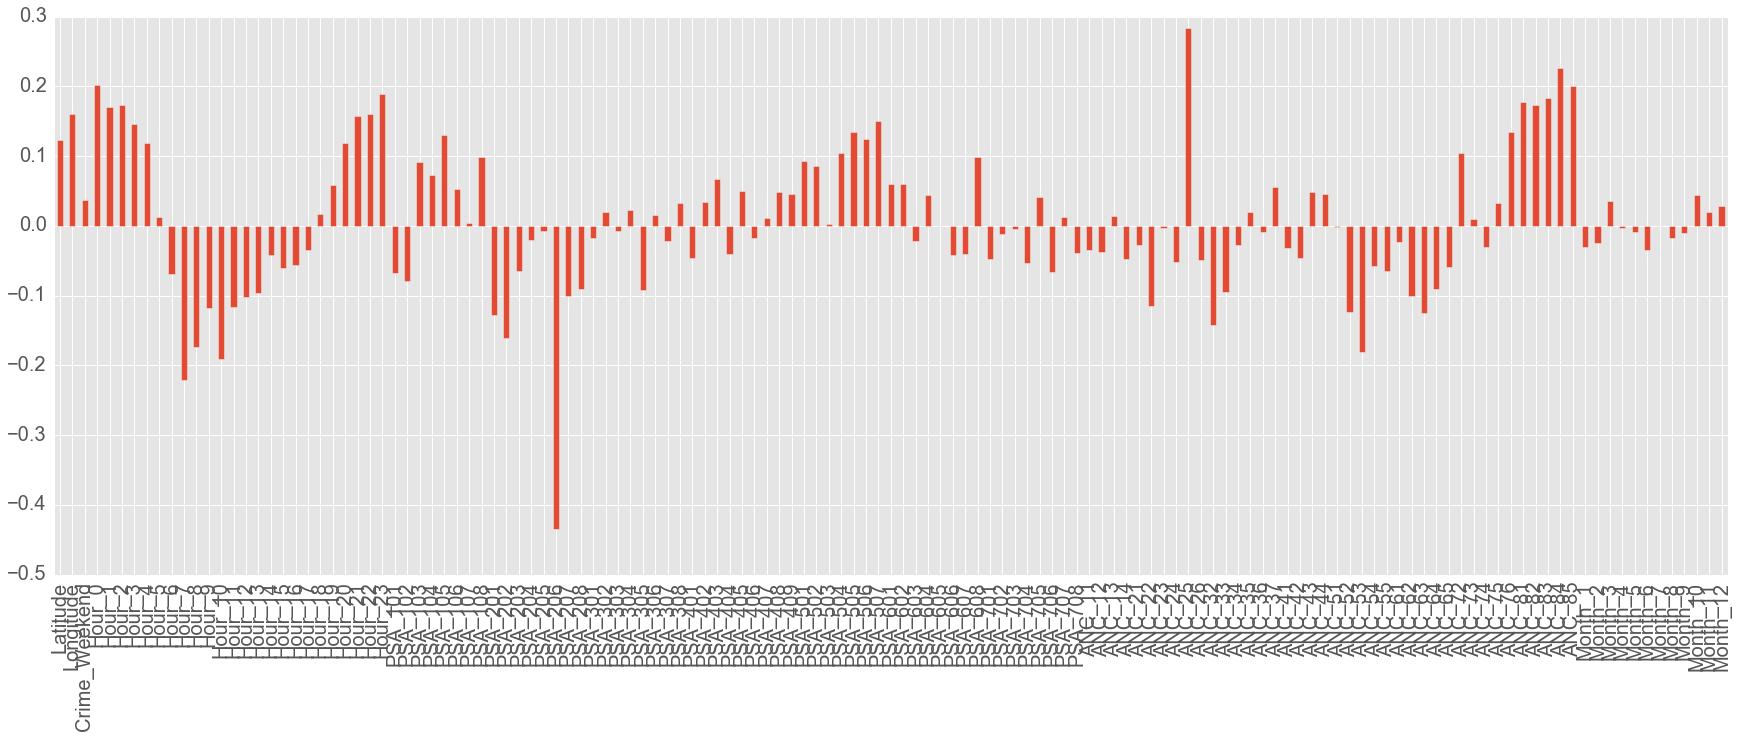

In [45]:
#3.1.9
#  Display the coefficients to see if they tell us anything
coefs = pd.DataFrame(zip(dc_expanded.columns, np.transpose(LRM_Model.coef_)), columns=['Factor','Coefficient'])
coefs['Odds_Ratio'] = coefs.Coefficient.map(lambda x: np.exp(x))

print "---==< Coefficients in descending order >==---"
#print coefs.reindex(coefs.Coefficient.abs().sort_values(ascending=False).index)
print coefs.reindex(coefs.Coefficient.sort_values(ascending=False).index)

plt.figure(figsize=(30,10))
plt.style.use('ggplot')
weights = pd.Series(LRM_Model.coef_[0],index=dc_expanded.columns)
weights.plot(kind='bar')
plt.show()


In [46]:
#coefs[83:123] = ANC

print coefs.reindex(coefs[:3].Coefficient.sort_values(ascending=False).index)

          Factor        Coefficient       Odds_Ratio
1      Longitude   [0.160261954145]   [1.1738183173]
0       Latitude   [0.122611339833]  [1.13044497662]
2  Crime_Weekend  [0.0365307979585]  [1.03720624736]


#### 3.1.10 - Interpretation of the Coefficients (RUBRIC ITEM 3)
There are some interesting items highlighted in the coefficients that might prove helpful for the police departments.

##### 3.1.10.1 - Advisory Neighborhood Commissions
* It was very interesting to see the distribution of violent crimes across the ANCs.  It was difficult to envision based on the identifiers, so we needed to plot them geographically.
  * The way we encoded the data for ANC (by converting the terminal letter to its ordinal position in the alphabet) allowed us to reassociate the numeric ANC back to its geographic identifier.
  * NOTE: The ANC with the highest odds ratio (2E @ 1.33) is a direct neighbor to one of the lowest odds ratio (3B @ 0.87).
![Violent ANC Map](images/anc_violent.png "Violent ANC")
<p style='text-align: center;'>
Odds Ratios for violent crimes by ANC
</p>

##### 3.1.10.2 - Geographic Location
* Note also that Latitude and Longitude have fairly large odds ratios as well (Latitude: 1.130, Longitude: 1.174).  The latitude coefficient implies that the odds of becoming a victim of a violent crime increases as one heads north - this is counter to what we see with the ANC distribution.
* Longitude values are negative in the Western Hemisphere, so an increase in longitude is equivalent to traveling east; thus, the positive coefficient implies that the odds increase as one travels east.  This, too, is counter to what we see with the ANC distribution.

##### 3.1.10.3 - Day of the Week/Weekend
* The original regression attempt showed us that the day of the week was not a significant factor - the coefficient for all days showed a trend of increasing as the week progressed through the weekend, and was slightly lower than the coefficient for a violent crime occurring on the weekend.  Thus, we removed the days of the week from consideration, but kept the weekend indicator variable.
* The coefficient (0.0365307979585) gives us an odds ratio of $e^{0.0365307979585}$ = 1.03720624736, indicating a slightly higher chance of becoming a victim of a violent crime on the weekends as opposed to during the work week.

##### 3.1.10.4 - Hour of the Day
* There is an interesting cyclic trend with the hour of the day that implies that from 6PM to 6AM, one's odds of being a victim of a violent crime are greater than during the period from 6AM to 6PM.
  * This trend spans two Police duty shifts (Evening shift is 3PM to 11PM, Midnight shift is 11PM to 7AM, and Day shift is 7AM to 3PM) 
  * Re-combining the hours into a binary Day/Night variable might be another good decision tree split point.

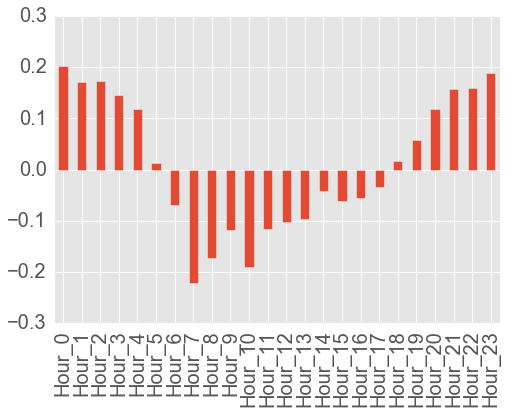

In [47]:
weights[3:27].plot(kind='bar')
plt.show()

##### 3.1.10.5 - Month of the Year
* We were also interested in seeing if there was a seasonal trend, but the coefficients seem to imply nearly the opposite of what we expected.
  * This (and our own curiosity) is what is pushing us to explore the weather data for these crimes

       Factor        Coefficient        Odds_Ratio
131   Month_9  [-0.010082972077]  [0.989967690666]
132  Month_10  [0.0445703193277]    [1.0455784985]
133  Month_11  [0.0195323238274]   [1.01972432772]
134  Month_12  [0.0287053983496]   [1.02912136896]


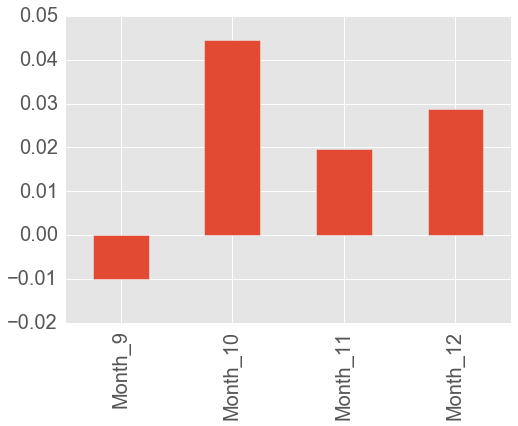

In [48]:
print coefs[131:]
weights[131:].plot(kind='bar')
plt.show()

#### 3.1.11 - Dimension Reduction (RUBRIC ITEM - EXCEPTIONAL)

Attempting to use a 135-factor model is simply not practical for the modest improvement in accuracy over simple guessing.  To address this, we decided to perform principal components analysis to attempt to reduce the dimensionality to something more manageable, but less interpretable.

In [49]:
# 3.1.11.1 - PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_pca = pca.fit(dc_expanded).transform(dc_expanded) # fit data and then transform it

# Examine just one record to see what it's doing...
dc_pca = pd.DataFrame(X_pca)
print dc_pca.ix[1234]

0    0.332184
1   -0.199130
2   -0.583242
3    0.896874
4   -0.445368
Name: 1234, dtype: float64


In [50]:
# 3.1.11.2 - Generate and test the model

PCA_XTrain4, PCA_XTest4, PCA_YTrain4, PCA_YTest4 = train_test_split(dc_pca, LRM_Response, test_size=0.2, random_state=0)

# Fit the model against the PCA training data
LRM_Model.fit(PCA_XTrain4,PCA_YTrain4)

# Generate predictions on the test set
Predictions4 = LRM_Model.predict(PCA_XTest4)

Model_Acc4 = metrics.accuracy_score(PCA_YTest4,Predictions4)
Model_Conf4 = metrics.confusion_matrix(PCA_YTest4,Predictions4)
print Model_Conf4
RateModel(Model_Acc4,PCA_YTest4.mean())

[[6001    0]
 [1297    0]]

---==< Logistic Regression Results >==---

Mean response for this data set is  0.177719923267

Model accuracy against this data set is  0.822280076733

If we simply guessed 'Property' crime all the time, our accuracy would be  0.822280076733

The model predictions are the same as guessing


##### 3.1.11.3
Attempting to reduce the one-hot-encoded values returned us to the original problem that guessing 'Property' all the time is just as accurate.  In fact, according to the confusion matrix, that is exactly what the model did -- classified everything as a property crime.

Let's go back to our 135 factor model and perform a 10-fold cross-validation to see if what we have is good enough to use.

In [51]:
# 3.1.11.4
# evaluate the model using 10-fold cross-validation

scores = cross_val_score(LogisticRegression(), dc_expanded, LRM_Response, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.83068493  0.83068493  0.82986301  0.81008495  0.08303645  0.64647849
  0.80866228  0.75301535  0.1058114   0.25164474]
0.594996653902


The answer is no - this is not a good model.

#### 3.1.12 - Manual Feature Selection (RUBRIC ITEM - EXCEPTIONAL)

Using the information provided by the coefficients from our 135-feature dataset, we decided to try re-defining some of the key features manually to see if we can get a better Logistic Regression model.

In [52]:
# 3.1.12.1 - Feature Creation (use Latitude and Longitude for all position-related features)

LRM_Features5 = dc[["Latitude","Longitude"]]

#LRM_Features5['Ward_34'] = 0  -- why does this NOT work?
#LRM_Features5.loc[:,'Ward_34'] = 0

#LRM_Features5.Ward_34[LRM_Features5.WARD == 4] = 1
#LRM_Features5.loc[dc.WARD == 3,'Ward_34'] = 1 # That's not Pythonic, that's just Moronic!
#LRM_Features5.loc[dc.WARD == 4,'Ward_34'] = 1

# 3.1.12.2 - Feature Creation (Day/Night)
LRM_Features5.loc[:,'Night'] = 0
LRM_Features5.loc[dc.Crime_Hour < 6,'Night'] = 1
LRM_Features5.loc[dc.Crime_Hour >= 18,'Night'] = 1


Man_XTrain5, Man_XTest5, Man_YTrain5, Man_YTest5 = train_test_split(LRM_Features5, LRM_Response, test_size=0.2, random_state=0)

# Fit the model against the manual training data
LRM_Model.fit(Man_XTrain5,Man_YTrain5)

# Generate predictions on the test set
Predictions5 = LRM_Model.predict(Man_XTest5)

Model_Acc5 = metrics.accuracy_score(Man_YTest5,Predictions5)
Model_Conf5 = metrics.confusion_matrix(Man_YTest5,Predictions5)
print Model_Conf5
RateModel(Model_Acc5,Man_YTest5.mean())

[[6001    0]
 [1297    0]]

---==< Logistic Regression Results >==---

Mean response for this data set is  0.177719923267

Model accuracy against this data set is  0.822280076733

If we simply guessed 'Property' crime all the time, our accuracy would be  0.822280076733

The model predictions are the same as guessing


### 2.2 - Support Vector Machine Model for Crime_Type (Rubric Item 1)

<a id='data_prep'></a>
## 4 - Data Preparation for Logistic Regression

In [56]:
#4.0.1 - Import the libraries we will need
import pandas as pd
import numpy as np
import math

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(font_scale=2)
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

# Graph Lab Support
# import graphlab as gl
# import graphlab
# keep data visualizations within notebook
# graphlab.canvas.set_target('ipynb')

# Read in the crime data from the Lab 1 CSV file
dc = pd.read_csv('data/DC_Crime_2015_Lab1.csv')

### *** TO DO:
###  * Incorporate a feature for the weather conditions during START_DATE and END_DATE so we can use rainfall/max temp/min temp in the regression
dc['REPORT_DAT'] = pd.to_datetime(dc['REPORT_DAT'])
dc=dc.rename(columns = {'REPORT_DAT':'REPORT_DATE'})
dc['START_DATE'] = pd.to_datetime(dc['START_DATE'])
dc['END_DATE'] = pd.to_datetime(dc['END_DATE'])
dc['XBLOCK'] = dc['XBLOCK'].astype(np.float64)
dc['YBLOCK'] = dc['YBLOCK'].astype(np.float64)
dc['Crime_Month'] = dc["START_DATE"].map(lambda x: x.month)
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36489 entries, 0 to 36488
Data columns (total 27 columns):
REPORT_DATE             36489 non-null datetime64[ns]
SHIFT                   36489 non-null object
OFFENSE                 36489 non-null object
METHOD                  36489 non-null object
DISTRICT                36442 non-null float64
PSA                     36441 non-null float64
WARD                    36489 non-null int64
ANC                     36489 non-null int64
NEIGHBORHOOD_CLUSTER    36489 non-null int64
CENSUS_TRACT            36489 non-null int64
VOTING_PRECINCT         36489 non-null int64
CCN                     36489 non-null int64
XBLOCK                  36489 non-null float64
YBLOCK                  36489 non-null float64
START_DATE              36489 non-null datetime64[ns]
END_DATE                36489 non-null datetime64[ns]
PSA_ID                  36489 non-null int64
DistrictID              36489 non-null int64
SHIFT_Code              36489 non-null int6

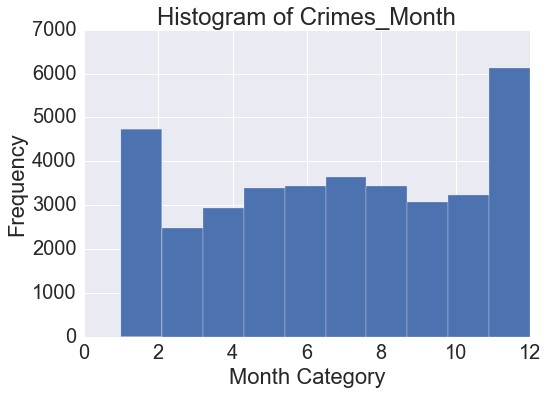

In [57]:
# histogram of Crimes Month
dc['Crime_Month'].hist()
plt.title('Histogram of Crimes_Month')
plt.xlabel('Month Category')
plt.ylabel('Frequency')

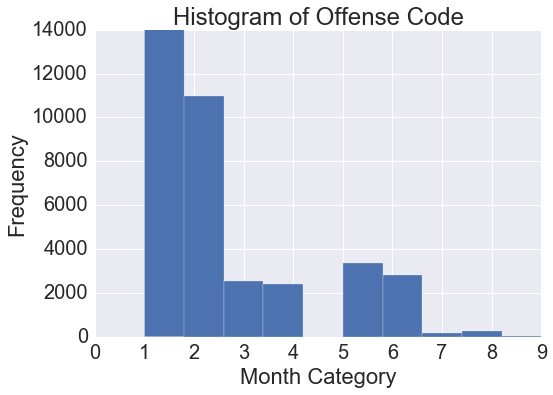

In [58]:
# histogram of Offense Code
dc['OFFENSE_Code'].hist()
plt.title('Histogram of Offense Code')
plt.xlabel('Month Category')
plt.ylabel('Frequency')

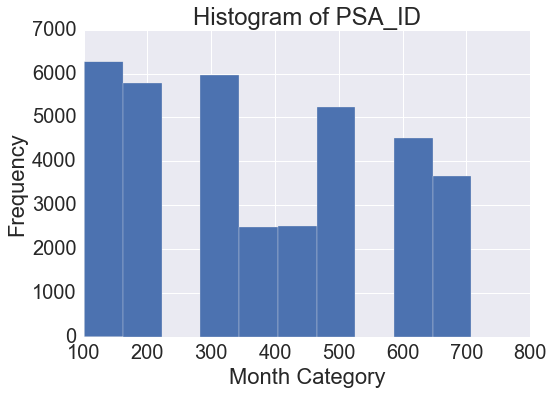

In [59]:
# histogram of PSA ID"
dc['PSA_ID'].hist()
plt.title('Histogram of PSA_ID')
plt.xlabel('Month Category')
plt.ylabel('Frequency')

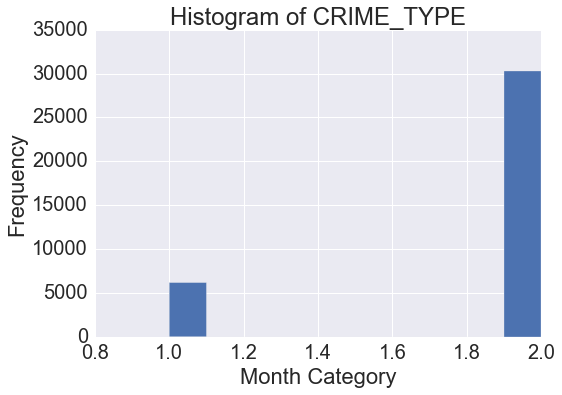

In [60]:
# histogram of CRIME_TYPE"
dc['CRIME_TYPE'].hist()
plt.title('Histogram of CRIME_TYPE')
plt.xlabel('Month Category')
plt.ylabel('Frequency')

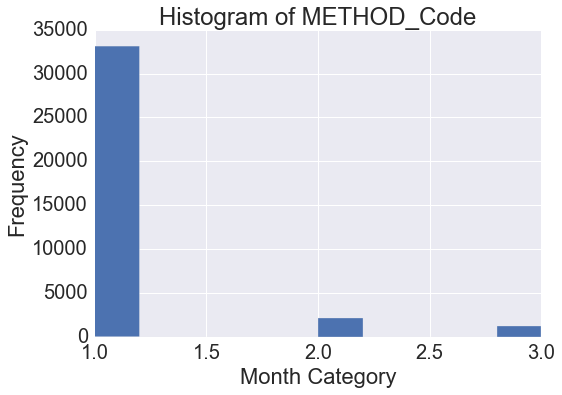

In [61]:
#METHOD_Code
dc['METHOD_Code'].hist()
plt.title('Histogram of METHOD_Code')
plt.xlabel('Month Category')
plt.ylabel('Frequency')

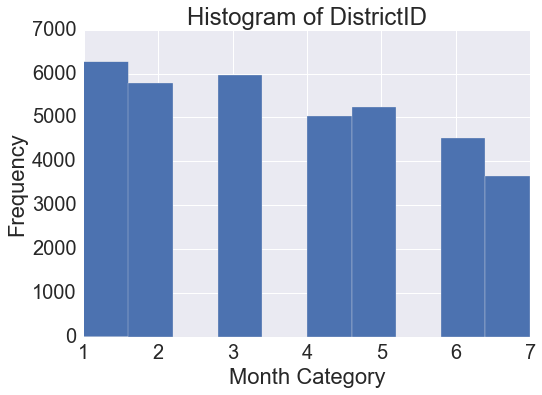

In [62]:
#DistrictID
dc['DistrictID'].hist()
plt.title('Histogram of DistrictID')
plt.xlabel('Month Category')
plt.ylabel('Frequency')

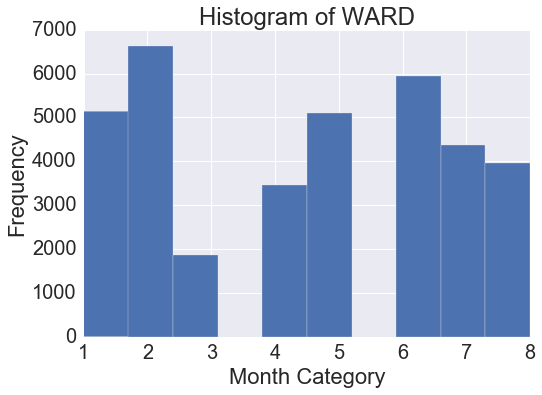

In [63]:
#Ward
dc['WARD'].hist()
plt.title('Histogram of WARD')
plt.xlabel('Month Category')
plt.ylabel('Frequency')

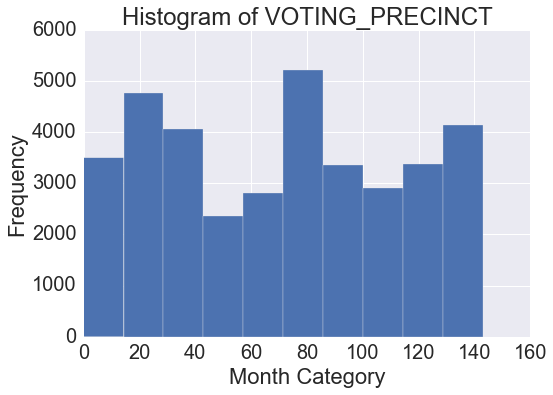

In [65]:
#VOTING_PRECINCT
dc['VOTING_PRECINCT'].hist()
plt.title('Histogram of VOTING_PRECINCT')
plt.xlabel('Month Category')
plt.ylabel('Frequency')

### 4.1 - Logistic Regression Model for Crime_Type (Rubric Item 1)

In [66]:
#4.1.1 Dataset creation

#  The field "CRIME_TYPE" exists as 1 = Violent, and 2 = Property.  
#  We subtract from 2 to make it 1 = Violent, and 0 = Property
LRM_Response = 2 - dc["CRIME_TYPE"]
#print LRM_Response

#  What is the mean response
Mean_Response = LRM_Response.mean()
print "Mean response for the entire data set is " + str(Mean_Response)

Guess_Rate = 1.0 - Mean_Response
print "If we simply guessed 'Property' crime all the time, our accuracy would be " + str(Guess_Rate)

#  Set up model using all relevant features
LRM_Features = dc[["PSA_ID","WARD","ANC","NEIGHBORHOOD_CLUSTER","CENSUS_TRACT","VOTING_PRECINCT","SHIFT_Code","Latitude","Longitude","Crime_Month"]]
#print LRM_Features

#  Fit our model
LRM_Model = LogisticRegression()
LRM_Model = LRM_Model.fit(LRM_Features, LRM_Response)

#  How accurate is it?
Model_Acc = LRM_Model.score(LRM_Features, LRM_Response)
print "Accuracy of Logistic Regression model is " + str(Model_Acc)

if Model_Acc > Guess_Rate:
    print "The Logistic Regression model is better than simply guessing"
else:
    print "The Logistic Regression model is worse than simply guessing"


Mean response for the entire data set is 0.169174271698
If we simply guessed 'Property' crime all the time, our accuracy would be 0.830825728302
Accuracy of Logistic Regression model is 0.830250212393
The Logistic Regression model is worse than simply guessing


In [67]:
#  Display the coefficients to see if they tell us anything
pd.DataFrame(zip(LRM_Features.columns, np.transpose(LRM_Model.coef_)))

,0,1
0,PSA_ID,[0.00167783221638]
1,WARD,[0.0195928056189]
2,ANC,[0.00886350684632]
3,NEIGHBORHOOD_CLUSTER,[-0.00232184509213]
4,CENSUS_TRACT,[-1.37492426304e-05]
5,VOTING_PRECINCT,[0.0014077633811]
6,SHIFT_Code,[0.79779478674]
7,Latitude,[-0.0193099343437]
8,Longitude,[0.0475113614735]
9,Crime_Month,[0.00955306118479]


* The most significant factor is the SHIFT (i.e. the time of day)
* The second-most significant factor is Longitude, implying that as you move east, your chances of being involved in a violent crime increases
* The third-most significant factor is political WARD, so there are some Wards that are worse than others
* The fourth-most significant factor is Latitude, but negatively, so there is a greater chance of being involved in a violent crime as you move south

In [68]:
# Split the data into a training set and a test set (80/20)

LRM_XTrain, LRM_XTest, LRM_YTrain, LRM_YTest = train_test_split(LRM_Features, 
                                                                LRM_Response, 
                                                                test_size=0.2, 
                                                                random_state=0)

# Fit the same features against the training data
LRM_Model2 = LogisticRegression()
LRM_Model2.fit(LRM_XTrain, LRM_YTrain)

#  How accurate is it?
Model_Acc = LRM_Model2.score(LRM_Features, LRM_Response)
print "Accuracy of Logistic Regression model is " + str(Model_Acc)

if Model_Acc > Guess_Rate:
    print "The Logistic Regression model is better than simply guessing"
else:
    print "The Logistic Regression model is worse than simply guessing"


Accuracy of Logistic Regression model is 0.830250212393
The Logistic Regression model is worse than simply guessing


In [69]:
predicted = LRM_Model2.predict(LRM_XTest)
print predicted

# generate class probabilities
probs = LRM_Model2.predict_proba(LRM_XTest)
print probs

# generate evaluation metrics
print metrics.accuracy_score(LRM_YTest, predicted)
print metrics.roc_auc_score(LRM_YTest, probs[:, 1])

print metrics.confusion_matrix(LRM_YTest, predicted)
print metrics.classification_report(LRM_YTest, predicted)

[0 0 0 ..., 0 0 0]
[[ 0.63591626  0.36408374]
 [ 0.85595284  0.14404716]
 [ 0.91546692  0.08453308]
 ..., 
 [ 0.87553755  0.12446245]
 [ 0.8437132   0.1562868 ]
 [ 0.86308122  0.13691878]]
0.824746505892
0.721215251069
[[5918   83]
 [1196  101]]
             precision    recall  f1-score   support

          0       0.83      0.99      0.90      6001
          1       0.55      0.08      0.14      1297

avg / total       0.78      0.82      0.77      7298



In [70]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), 
                         LRM_Features,
                         LRM_Response, 
                         scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.83068493  0.83068493  0.83068493  0.83091258  0.83091258  0.83063853
  0.83086623  0.83114035  0.85032895  0.71984649]
0.821670050075


### 4.2 - Support Vector Machine Model for Crime_Type (Rubric Item 1)

### 4.3 - Logistic Regression Model for Offense_Code (Exceptional Work)


# Case 1a: Logistic Regression 

# Multi-variate Classification Analysis without Dummy Variables for the Input Categorical Variables

* **Python 2.7 skLearn Libraries**
* **Similar to the analysis done with Logistic Regression Model for Crime_Type**


In [71]:
#4.1.1 Dataset creation

#  The field "OFFENSE_Code" exists as 1 = XX, 2 = YY, ...... 9 = ZZ 
#  OFFENSE_Code is a Multi-Variate Classification 
#  LogisticRegression can handle multiple classes out-of-the-box.
#  http://stackoverflow.com/questions/36760000/python-how-to-use-multinomial-logistic-regression-using-sklearn
LRM_Response = dc["OFFENSE_Code"]
#print LRM_Response

my_custom_features = ["PSA_ID",
                      "WARD",
                      "ANC",
                      "NEIGHBORHOOD_CLUSTER",
                      "CENSUS_TRACT",
                      "VOTING_PRECINCT",
                      "SHIFT_Code",
                      "Crime_Month",
                      "DistrictID",
                      "Latitude",
                      "Longitude"]

#  Set up model using all relevant features
LRM_Features = dc[my_custom_features]
#print LRM_Features

# Logistic Regression

Let's go ahead and run logistic regression on the entire data set, and see how accurate it is!

In [72]:
# instantiate a logistic regression model, and fit with LRM_Features and LRM_Response
#  Fit our model
LRM_Model3 = LogisticRegression()
LRM_Model3 = LRM_Model3.fit(LRM_Features, LRM_Response)

# check the accuracy on the training set
LRM_Model3.score(LRM_Features, LRM_Response)

0.38847323851023596

In [73]:
# what percentage had OFFENSE_Code?
LRM_Response.mean()

2.468634382964729

Let's examine the coefficients to see what we learn.

In [74]:
# examine the coefficients
pd.DataFrame(zip(LRM_Features.columns, np.transpose(LRM_Model.coef_)))

,0,1
0,PSA_ID,[0.00167783221638]
1,WARD,[0.0195928056189]
2,ANC,[0.00886350684632]
3,NEIGHBORHOOD_CLUSTER,[-0.00232184509213]
4,CENSUS_TRACT,[-1.37492426304e-05]
5,VOTING_PRECINCT,[0.0014077633811]
6,SHIFT_Code,[0.79779478674]
7,Crime_Month,[-0.0193099343437]
8,DistrictID,[0.0475113614735]
9,Latitude,[0.00955306118479]


# Each of the values listed in the table seems to be a vector of values

* The most significant factor is the CENSUS_TRACT (positive) 
* The second-most significant factor is SHIFT_Code (negative)
* The third-most significant factor is WARD (negative)
* The fourth-most significant factor is NEIGHBORHOOD_CLUSTER (negative)

In [75]:
# Split the data into a training set and a test set (80/20)

LRM_XTrain, LRM_XTest, LRM_YTrain, LRM_YTest = train_test_split(LRM_Features, 
                                                                LRM_Response, 
                                                                test_size=0.2, 
                                                                random_state=0)

# Fit the same features against the training data
LRM_Model4 = LogisticRegression()
LRM_Model4.fit(LRM_XTrain, LRM_YTrain)

#  How accurate is it?
Model_Acc = LRM_Model4.score(LRM_Features, LRM_Response)
print "Accuracy of Logistic Regression model is:\t{:04.2f}% ".format(Model_Acc*100)

Accuracy of Logistic Regression model is:	38.86% 


# Case 1b: Logistic Regression¶
Multi-variate Classification Analysis without Dummy Variables for the Input Categorical Variables

* **Python 2.7 skLearn Libraries**
* **Similar to the analysis done with Logistic Regression Model Dr. Eric Larson**

In [76]:
list(dc)

['REPORT_DATE',
 'SHIFT',
 'OFFENSE',
 'METHOD',
 'DISTRICT',
 'PSA',
 'WARD',
 'ANC',
 'NEIGHBORHOOD_CLUSTER',
 'CENSUS_TRACT',
 'VOTING_PRECINCT',
 'CCN',
 'XBLOCK',
 'YBLOCK',
 'START_DATE',
 'END_DATE',
 'PSA_ID',
 'DistrictID',
 'SHIFT_Code',
 'OFFENSE_Code',
 'METHOD_Code',
 'CRIME_TYPE',
 'AGE',
 'TIME_TO_REPORT',
 'Latitude',
 'Longitude',
 'Crime_Month']

In [77]:
misc_input_features = ['REPORT_DATE',
                 'SHIFT',
                 'METHOD',
                 'DISTRICT',
                 'PSA',
                 'CCN',
                 'XBLOCK',
                 'YBLOCK',
                 'START_DATE',
                 'END_DATE',
                 'AGE',
                 'TIME_TO_REPORT']

for feature in misc_input_features:
    if feature in dc:
        del dc[feature]
   
output_features = ['OFFENSE',
                  'METHOD_Code',
                  'CRIME_TYPE']

for feature in output_features:
    if feature in dc:
        del dc[feature]

In [78]:
list(dc)

['WARD',
 'ANC',
 'NEIGHBORHOOD_CLUSTER',
 'CENSUS_TRACT',
 'VOTING_PRECINCT',
 'PSA_ID',
 'DistrictID',
 'SHIFT_Code',
 'OFFENSE_Code',
 'Latitude',
 'Longitude',
 'Crime_Month']

# Training and Testing Split
For training and testing purposes, let's gather the data we have and grab 80% of the instances for training and the remaining 20% for testing. Moreover, let's repeat this process of separating the testing and training data three times. We will use the hold out cross validation method built into `scikit-learn`.

In [79]:
from sklearn.cross_validation import ShuffleSplit

# we want to predict the X and y data as follows:
if 'OFFENSE_Code' in dc:
    y = dc['OFFENSE_Code'].values # get the labels we want
    del dc['OFFENSE_Code'] # get rid of the class label
    X = dc.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n=num_instances,
                         n_iter=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(36489, n_iter=3, test_size=0.2, random_state=None)


# Logistic Regression

Now let's use Logistic Regression from scikit-learn. The documentation can be found here:


http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# Multiclass Option

* 'ovr' versus 'multinomial'
  * 'ovr': Binary Classifier
  * 'multinomial': Multiclass classification means a classification task with more than two classes
  
  
  * **OFFENSE_Code** is a multivariate classification variable which can be either one of nine values listed above (0 thru 9).
    * Therefore, we MUST use the 'multinomial' option. 
    * Out of the box, the multiclass option is defaulted to 'ovr' which is a binary classification!!
    
    
  * I found that the solver = sag did not work with my Python kernel
     * Caused Python compilation error
  * Switched to 'newton-cg' with max_iter=150 the LogisticRegressio() worked without any errors.
      * It took some time for the code to actually execute.
      * Be patient
  
* Multiclass classification means a classification task with more than two classes; e.g., classify a set of images of fruits which may be oranges, apples, or pears. Multiclass classification makes the assumption that each sample is assigned to one and only one label: a fruit can be either an apple or a pear but not both at the same time.

* http://stackoverflow.com/questions/36523558/multi-class-logistic-regression-in-scikit-learn

# More on Logistic Regression

* It became apparent to carefully read the sklearn on-line documentation to gain a full understanding on how to use the LogisticRegression API

|Case|Solver|
|:------|:----------:|
|Small dataset or L1 penalty|“liblinear”|
|Multinomial loss or large dataset|“lbfgs”, “sag” or “newton-cg”|
|"solver" option | The "sag" option caused Python kernel compilation errors |
| "solver" option | Tested with "lbfgs" and "newton-cg" ONLY |
|      | Code listed below will generate the multi-variate classificaton based on the "solver" options used |
|Very Large dataset| 	“sag”|



* The “lbfgs”, “sag” and “newton-cg” solvers only support L2 penalization and are found to converge faster for some high dimensional data. 

* Setting multi_class to “multinomial” with these solvers learns a true multinomial logistic regression model, which means that its probability estimates should be better calibrated than the default “one-vs-rest” setting. 

* The “lbfgs”, “sag” and “newton-cg”” solvers cannot optimize L1-penalized models, therefore the “multinomial” setting does not learn sparse models.

In [86]:
'''
MultiNomialLogisticRegression:

Perform Multi-nomial/Multi-Variate Logistic Regression
No need to duplicate code through-out this IPython notebook
Out of the box, the LogisticRegression class defaults to 
Binary Classification.  Here we, need the output variable
to support multiple values; therefore we need to setup the
LogisiticRegression API for multi-nomial.

Also note that every time you run the code below, it randomly 
creates a new training and testing set, so accuracy will be 
different each time
'''

# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

def MultiNomialLogisticRegression():
    
    from sklearn.linear_model import LogisticRegression
    from sklearn import metrics as mt
    
    # first we create a reusable logisitic regression object
    #   here we can setup the object with different learning parameters and constants
    # multi_class : str, {‘ovr’, ‘multinomial’}, default: ‘ovr’
    '''
    Multiclass option can be either ‘ovr’ or ‘multinomial’. 

    If the option chosen is ‘ovr’, 
      then a binary problem is fit for each label.
    Else the loss minimised is the multinomial loss fit across the entire 
    probability distribution. 
    Works only for the ‘newton-cg’, ‘sag’ and ‘lbfgs’solver.
    solver in [‘newton-cg’, ‘sag’ and ‘lbfgs’]
    '''
    multi_class = 'multinomial'

    # now we can use the cv_object that we setup before to iterate through the 
    #    different training and testing sets. Each time we will reuse the logisitic regression 
    #    object, but it gets trained on different data each time we use it.

    for solver in ('lbfgs', 'newton-cg'):
        
        lr_clf = LogisticRegression(penalty='l2',  
                                    multi_class=multi_class,
                                    max_iter=200,
                                    solver=solver) # get object
    
        print("\n\n")
        iter_num=0
        # the indices are the rows used for training and testing in each iteration
        for train_indices, test_indices in cv_object: 
            # I will create new variables here so that it is more obvious what 
            # the code is doing (you can compact this syntax and avoid duplicating memory,
            # but it makes this code less readable)
            X_train = X[train_indices]
            y_train = y[train_indices]
    
            X_test = X[test_indices]
            y_test = y[test_indices]
    
            # train the reusable logisitc regression model on the training data
            lr_clf.fit(X_train,y_train)  # train object
            y_hat = lr_clf.predict(X_test) # get test set precitions

            # now let's get the accuracy and confusion matrix for this iterations of training/testing
            acc = mt.accuracy_score(y_test,y_hat)
            conf = mt.confusion_matrix(y_test,y_hat)
            print("SOLVER ALGORITHM USED:", solver)
            print("====Iteration",iter_num)
            print("accuracy", acc )
            print("\nconfusion matrix\n")
            print (conf)
            print("\n")
            iter_num+=1
            
    return lr_clf, X_train, y_train, X_test, y_test

In [87]:
lr_clf, X_train, y_train, X_test, y_test = MultiNomialLogisticRegression()




('SOLVER ALGORITHM USED:', 'lbfgs')
('====Iteration', 0)
('accuracy', 0.38928473554398463)

confusion matrix

[[2837    7    0    0    0    0    0    0    0]
 [2174    4    0    0    0    0    0    0    0]
 [ 480    1    0    0    0    0    0    0    0]
 [ 474    5    0    0    0    0    0    0    0]
 [ 645    5    0    0    0    0    0    0    0]
 [ 559    2    0    0    0    0    0    0    0]
 [  33    0    0    0    0    0    0    0    0]
 [  69    0    0    0    0    0    0    0    0]
 [   3    0    0    0    0    0    0    0    0]]


('SOLVER ALGORITHM USED:', 'lbfgs')
('====Iteration', 1)
('accuracy', 0.3790079473828446)

confusion matrix

[[2502  295    0    0    0    0    0    0    0]
 [1927  264    0    0    0    0    0    0    0]
 [ 407   95    0    0    0    0    0    0    0]
 [ 375   91    0    0    0    0    0    0    0]
 [ 555  143    0    0    0    0    0    0    0]
 [ 424  122    0    0    0    0    0    0    0]
 [  32    8    0    0    0    0    0    0    0]
 [  42 

In [84]:
# this does the exact same thing as the above block of code, but with shorter syntax
from sklearn import metrics as mt

for iter_num, (train_indices, test_indices) in enumerate(cv_object):
    lr_clf.fit(X[train_indices],y[train_indices])  # train object
    y_hat = lr_clf.predict(X[test_indices]) # get test set precitions

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num," ====")
    print("accuracy", mt.accuracy_score(y[test_indices],y_hat)) 
    print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat))

('====Iteration', 0, ' ====')
('accuracy', 0.39216223622910384)
('confusion matrix\n', array([[2454,  202,    0,   27,   55,    0,    0,    0,    0],
       [1887,  331,    0,   11,   31,    0,    0,    0,    0],
       [ 393,   64,    0,   10,   30,    0,    0,    0,    0],
       [ 354,   34,    0,   27,   44,    0,    0,    0,    0],
       [ 558,   68,    0,   19,   50,    0,    0,    0,    0],
       [ 456,   62,    0,   15,   31,    0,    0,    0,    0],
       [  11,    2,    0,    6,    6,    0,    0,    0,    0],
       [  39,    8,    0,    2,    4,    0,    0,    0,    0],
       [   5,    1,    0,    1,    0,    0,    0,    0,    0]]))
('====Iteration', 1, ' ====')
('accuracy', 0.3943546177034804)
('confusion matrix\n', array([[2488,  283,    0,   25,   56,    0,    0,    0,    0],
       [1789,  322,    0,    6,   20,    0,    0,    0,    0],
       [ 412,   69,    0,    9,   25,    0,    0,    0,    0],
       [ 375,   29,    0,   29,   40,    0,    0,    0,    0],
      

In [88]:
# and here is an even shorter way of getting the accuracies for each training and test set
from sklearn.cross_validation import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

[ 0.3931214   0.40010962  0.38366676]


In [89]:
# here we can change some of the parameters interactively
from ipywidgets import widgets as wd

def lr_explor(cost):
    multi_class = 'multinomial' 
    solver = 'lbfgs'
    lr_clf = LogisticRegression(penalty='l2',  
                                multi_class=multi_class,
                                max_iter=200,
                                solver=solver) # get object
    
    accuracies = cross_val_score(lr_clf,X,y=y,cv=cv_object) # this also can help with parallelism
    print(accuracies)

wd.interact(lr_explor,cost=(0.001,5.0,0.05))

[ 0.38859962  0.38914771  0.38654426]


<function __main__.lr_explor>

# Interpretting weights

Okay, so now lets take the last trained model for logistic regression and try to interpret the weights for the model. Is there something about the weights that makes this model more interpretable?

In [90]:
# interpret the weights

# iterate over the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = dc.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])
    
# does this look correct? 

('WARD', 'has weight of', -0.27563789798938881)
('ANC', 'has weight of', 0.0096113359915577859)
('NEIGHBORHOOD_CLUSTER', 'has weight of', 0.0029168601948521898)
('CENSUS_TRACT', 'has weight of', 5.7434160264441752e-05)
('VOTING_PRECINCT', 'has weight of', -0.0010728172333126776)
('PSA_ID', 'has weight of', -0.01014022477677143)
('DistrictID', 'has weight of', 0.83292268284817461)
('SHIFT_Code', 'has weight of', -0.77216372713921066)
('Latitude', 'has weight of', -3.3813002113255797)
('Longitude', 'has weight of', -1.7796948641276862)
('Crime_Month', 'has weight of', -0.0034868063836797133)


These weight interpretations are not neccessarily interpretable because of the values we had. Very large attribute values could just as easily be assigned a higher weight. Instead, let's normalize the feature values so that all the attributes are on the same dynamic range. Once we normalize the attributes, the weights should have magnitudes that reflect their poredictive power in the logistic regression model.

In [91]:
from sklearn.preprocessing import StandardScaler

'''
# train the model just as before
multi_class = 'multinomial' 
solver = 'lbfgs'
lr_clf = LogisticRegression(penalty='l2',  
                            multi_class=multi_class,
                            max_iter=200,
                            solver=solver) # get object
'''

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
#lr_clf = LogisticRegression(penalty='l2', C=0.05) # get object, the 'C' value is less (can you guess why??)

multi_class = 'multinomial' 
solver = 'lbfgs'
lr_clf = LogisticRegression(penalty='l2',  
                            multi_class=multi_class,
                            max_iter=200,
                            solver=solver) # get object

lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,dc.columns) # combine attributes
#zip_vars.sort(key = lambda t: np.abs(t[0])) # sort them by the magnitude of the weight
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out


('accuracy:', 0.39408057001918334)
[[2289  374    0   11   84    0    0    0    0]
 [1662  524    0   11   25    0    0    0    0]
 [ 371  105    0    7   20    0    0    0    0]
 [ 354   81    0   21   44    0    0    0    0]
 [ 500  144    0    8   42    0    0    0    0]
 [ 377  124    0    8   25    0    0    0    0]
 [  11    2    0    3   11    0    0    0    0]
 [  41   14    0    1    2    0    0    0    0]
 [   0    1    0    1    0    0    0    0    0]]
('WARD', 'has weight of', -0.63001462253298868)
('ANC', 'has weight of', 0.25106366588248508)
('NEIGHBORHOOD_CLUSTER', 'has weight of', 0.069633643408224102)
('CENSUS_TRACT', 'has weight of', 0.17861864329902624)
('VOTING_PRECINCT', 'has weight of', -0.027870953466685756)
('PSA_ID', 'has weight of', -2.0978557053890921)
('DistrictID', 'has weight of', 1.7736899449100987)
('SHIFT_Code', 'has weight of', -0.67231475777518068)
('Latitude', 'has weight of', -0.13505352531819143)
('Longitude', 'has weight of', -0.17885712882897886)

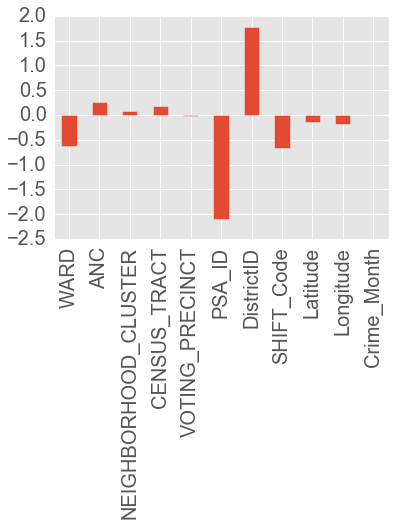

In [92]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

weights = pd.Series(lr_clf.coef_[0],index=dc.columns)
weights.plot(kind='bar')
plt.show()

**For more improvement and guarding against overfitting:** At this point it would make sense to remove variables that are highly related to one another or ones that are irrelevant and keep going with the weights analysis. What variables would you remove?

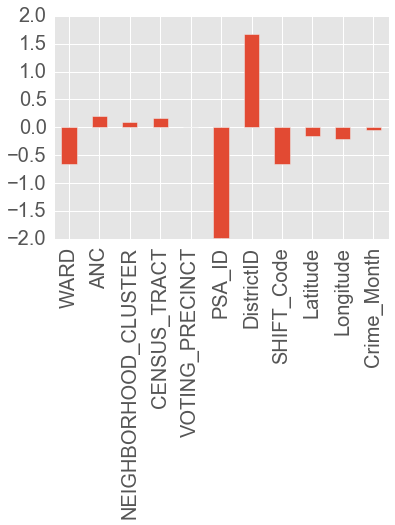

In [93]:
# you can also apply the StandardScaler function insied of the validation loop 
#  but this requires the use of PipeLines in scikit. Here is an example, but we will go over more 
#  thorough examples later in class

from sklearn.pipeline import Pipeline

std_scl = StandardScaler()
#lr_clf = LogisticRegression(penalty='l2', C=0.05) 
multi_class = 'multinomial' 
solver = 'lbfgs'
lr_clf = LogisticRegression(penalty='l2',  
                            multi_class=multi_class,
                            max_iter=200,
                            solver=solver) # get object

# create the pipline
piped_object = Pipeline([('scale', std_scl), ('logit_model', lr_clf)])


# run the pipline corssvalidated
for iter_num, (train_indices, test_indices) in enumerate(cv_object):
    piped_object.fit(X[train_indices],y[train_indices])  # train object

# it is a little odd getting trained objects from a  pipeline:
trained_model_from_pipeline = piped_object.named_steps['logit_model']

# now look at the weights
weights = pd.Series(trained_model_from_pipeline.coef_[0],index=dc.columns)
weights.plot(kind='bar')
plt.show()

# SVM Support

In [94]:
# okay, so run through the cross validation loop and set the training and testing variable for one single iteration
for train_indices, test_indices in cv_object: 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 

In [95]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

('accuracy:', 0.39517676075637159)
[[2543  247    0    0    0    0    0    0    0]
 [1828  341    0    0    0    0    0    0    0]
 [ 449   82    0    0    0    0    0    0    0]
 [ 421   34    0    0    0    0    0    0    0]
 [ 604  106    0    0    0    0    0    0    0]
 [ 486   76    0    0    0    0    0    0    0]
 [  33    2    0    0    0    0    0    0    0]
 [  35    8    0    0    0    0    0    0    0]
 [   2    1    0    0    0    0    0    0    0]]


In [96]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(27661L, 11L)
(27661L,)
[9680 8801 2003 1935 2642 2232  123  230   15]


[[ -9.56829173e-01   7.52054506e-01  -2.51724892e-02   1.94253768e-02
   -1.00451564e-01  -2.06608752e+00   1.94452086e+00   2.91997620e-02
   -5.69626953e-01   1.01899925e-01   1.11910271e-02]
 [ -8.46835664e-05   5.30120481e-05  -5.53499892e-05  -4.56716020e-05
   -4.36020877e-05  -1.33358581e-02   1.32851178e-02   1.75707363e-05
   -5.18972639e-05  -3.67827668e-05   1.10178836e-05]
 [ -5.71336715e-05  -5.16602108e-06   5.44516607e-05  -2.77152761e-05
   -1.19765469e-04  -1.32680967e-02   1.32547263e-02   5.36017171e-06
   -1.41114938e-04   1.03913176e-04  -6.25692659e-05]
 [ -3.16142096e-05   7.03894090e-05  -6.42861290e-05  -5.24179075e-05
   -1.57242778e-05  -1.19130711e-02   1.18857492e-02   1.62026309e-05
   -2.42459709e-05  -5.10893276e-05   3.76912979e-07]
 [  2.20610984e-05  -9.13388000e-05  -1.54337334e-05   1.45496378e-05
    7.11799693e-05  -1.32912556e-02   1.33386357e-02   2.11028241e-05
    2.21458896e-05  -5.91399879e-05  -3.60740437e-05]
 [ -4.03754606e-04   4.7868366

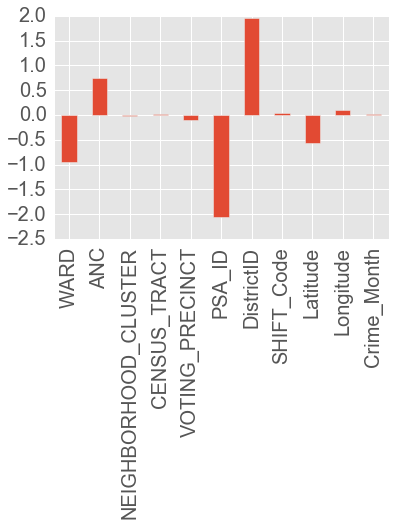

In [97]:
# if using linear kernel, these make sense to look at (not otherwise, why?)
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=dc.columns)
weights.plot(kind='bar')

In [98]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = dc.iloc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:]

df_support['OFFENSE_Code'] = y[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
dc['OFFENSE_Code'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27661 entries, 29956 to 1197
Data columns (total 12 columns):
WARD                    27661 non-null int64
ANC                     27661 non-null int64
NEIGHBORHOOD_CLUSTER    27661 non-null int64
CENSUS_TRACT            27661 non-null int64
VOTING_PRECINCT         27661 non-null int64
PSA_ID                  27661 non-null int64
DistrictID              27661 non-null int64
SHIFT_Code              27661 non-null int64
Latitude                27661 non-null float64
Longitude               27661 non-null float64
Crime_Month             27661 non-null int64
OFFENSE_Code            27661 non-null int64
dtypes: float64(2), int64(10)
memory usage: 2.7 MB


C:\Users\austi\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Case 2: Logistic Regression 

# Multi-variate Classification Analysis with Dummy Variables for the Input Categorical Variables

* **Python 2.7 skLearn Libraries**

# Initial Attempt to Perform One Hot Encoding on the Input Categorical Variables

##### The Python 2.7.X kernel could not handle all of the One Hot Encoding for all of the categorical variable computation in one cell and threw an error.

* **Therefore, in each unique cell performed one hot encoding on each categorical variable individually.   This was inconvenient but we will note this issue and investigate this issue later.**

Transform all of the input categorical attributes within the final **DC DataFrame** --one for each possible variable outcome.  Here, we will use OneHotEncoding to take on each value for each variable attribute value.

Input Categorical Attributes/Features provided in the DC DataFrame
* **PSA_ID**
* **WARD**
* **ANC**
* **NEIGHBORHOOD_CLUSTER**
* **CENSUS_TRACT**
* **VOTING_PRECINCT**
* **DistrictID**
* **SHIFT_Code**
* **Crime_Month**

In [99]:
del dc

In [101]:
#1.0.1 - Import the libraries we will need
import pandas as pd
import numpy as np
import math

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(font_scale=2)
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

# Graph Lab Support
# import graphlab as gl
# import graphlab
# keep data visualizations within notebook
# graphlab.canvas.set_target('ipynb')

dc = pd.read_csv('data/DC_Crime_2015_Lab1.csv')

### *** TO DO:
###  * Incorporate a feature for the weather conditions during START_DATE and END_DATE so we can use rainfall/max temp/min temp in the regression
dc['REPORT_DAT'] = pd.to_datetime(dc['REPORT_DAT'])
dc=dc.rename(columns = {'REPORT_DAT':'REPORT_DATE'})
dc['START_DATE'] = pd.to_datetime(dc['START_DATE'])
dc['END_DATE'] = pd.to_datetime(dc['END_DATE'])
dc['XBLOCK'] = dc['XBLOCK'].astype(np.float64)
dc['YBLOCK'] = dc['YBLOCK'].astype(np.float64)
dc['Crime_Month'] = dc["START_DATE"].map(lambda x: x.month)
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36489 entries, 0 to 36488
Data columns (total 27 columns):
REPORT_DATE             36489 non-null datetime64[ns]
SHIFT                   36489 non-null object
OFFENSE                 36489 non-null object
METHOD                  36489 non-null object
DISTRICT                36442 non-null float64
PSA                     36441 non-null float64
WARD                    36489 non-null int64
ANC                     36489 non-null int64
NEIGHBORHOOD_CLUSTER    36489 non-null int64
CENSUS_TRACT            36489 non-null int64
VOTING_PRECINCT         36489 non-null int64
CCN                     36489 non-null int64
XBLOCK                  36489 non-null float64
YBLOCK                  36489 non-null float64
START_DATE              36489 non-null datetime64[ns]
END_DATE                36489 non-null datetime64[ns]
PSA_ID                  36489 non-null int64
DistrictID              36489 non-null int64
SHIFT_Code              36489 non-null int6

In [102]:
# perform one-hot encoding of the categorical data "PSA_ID"
tmp_psa_id_df = pd.get_dummies(dc.PSA_ID, prefix='PSA_ID')
dc = pd.concat((dc,tmp_psa_id_df),axis=1) # add back into the dataframe

# perform one-hot encoding of the categorical data "WARD"
tmp_ward_df = pd.get_dummies(dc.WARD, prefix='WARD')
dc = pd.concat((dc,tmp_ward_df),axis=1) # add back into the dataframe

# perform one-hot encoding of the categorical data "ANC"
tmp_anc_df = pd.get_dummies(dc.ANC, prefix='ANC')
dc = pd.concat((dc,tmp_anc_df),axis=1) # add back into the dataframe

# perform one-hot encoding of the categorical data "NEIGHBORHOOD_CLUSTER"
tmp_NEIGHBORHOOD_CLUSTER_df = pd.get_dummies(dc.NEIGHBORHOOD_CLUSTER,prefix='NEIGHBORHOOD_CLUSTER')
dc = pd.concat((dc,tmp_NEIGHBORHOOD_CLUSTER_df),axis=1) # add back into the dataframe

# perform one-hot encoding of the categorical data "CENSUS_TRACT"
tmp_census_tract_df = pd.get_dummies(dc.CENSUS_TRACT,prefix='CENSUS_TRACT')
dc = pd.concat((dc,tmp_census_tract_df),axis=1) # add back into the dataframe

# VOTING_PRECINCT
tmp_VOTING_PRECINCT_df = pd.get_dummies(dc.VOTING_PRECINCT,prefix='VOTING_PRECINCT')
dc = pd.concat((dc,tmp_VOTING_PRECINCT_df),axis=1) # add back into the dataframe

# DistrictID
# perform one-hot encoding of the categorical data "DistrictID"
tmp_DistrictID_df = pd.get_dummies(dc.DistrictID,prefix='DistrictID')
dc = pd.concat((dc,tmp_DistrictID_df),axis=1) # add back into the dataframe

# SHIFT_Code
tmp_SHIFT_Code_df = pd.get_dummies(dc.SHIFT_Code,prefix='SHIFT_Code')
dc = pd.concat((dc,tmp_SHIFT_Code_df),axis=1) # add back into the dataframe

# Crime_Month
tmp_Crime_Month_df = pd.get_dummies(dc.Crime_Month,prefix='Crime_Month')
dc = pd.concat((dc,tmp_Crime_Month_df),axis=1) # add back into the dataframe

# Another attempt to write a loop to perform One Hot Encoding


###  This did not work either....


  * This seemed like the logical thing to do but we did not get the output behaviour as intended. 
  
  * This idea was scratched.   

In [103]:
my_custom_features = ["PSA_ID",
                      "WARD",
                      "ANC",
                      "NEIGHBORHOOD_CLUSTER",
                      "CENSUS_TRACT",
                      "VOTING_PRECINCT",
                      "DistrictID",
                      "SHIFT_Code",
                      "Crime_Month"]

for feature in my_custom_features:
    print feature
    temp_data_frame = pd.get_dummies(dc[feature], prefix = feature)
    dc = pd.concat((dc, temp_data_frame),axis=1) # add back into the dataframe)

PSA_ID
WARD
ANC
NEIGHBORHOOD_CLUSTER
CENSUS_TRACT
VOTING_PRECINCT
DistrictID
SHIFT_Code
Crime_Month


In [104]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36489 entries, 0 to 36488
Columns: 1007 entries, REPORT_DATE to Crime_Month_12
dtypes: datetime64[ns](3), float64(986), int64(15), object(3)
memory usage: 280.3+ MB


In [105]:
# Now let's look a little further at each of the categorical objects. 
# Note that age range has already been saved as an ordinal. 

my_custom_features = ["PSA_ID",
                      "WARD",
                      "ANC",
                      "NEIGHBORHOOD_CLUSTER",
                      "CENSUS_TRACT",
                      "VOTING_PRECINCT",
                      "DistrictID",
                      "SHIFT_Code",
                      "Crime_Month"]

Transform all of the input categorical attributes within the final **DC DataFrame** --one for each possible variable outcome.  Here, we will use OneHotEncoding to take on each value for each variable attribute value.

Each cell will perform One Hot Encoding for a unique categorical variable to get around the errors that was experienced earlier. 

Input Categorical Attributes/Features provided in the DC DataFrame
* **PSA_ID**
* **WARD**
* **ANC**
* **NEIGHBORHOOD_CLUSTER**
* **CENSUS_TRACT**
* **VOTING_PRECINCT**
* **DistrictID**
* **SHIFT_Code**
* **Crime_Month**



In [107]:
# perform one-hot encoding of the categorical data "PSA_ID"
tmp_psa_id_df = pd.get_dummies(dc.PSA_ID,prefix='PSA_ID')
dc = pd.concat((dc,tmp_psa_id_df),axis=1) # add back into the dataframe

In [108]:
# perform one-hot encoding of the categorical data "WARD"
tmp_ward_df = pd.get_dummies(dc.WARD,prefix='WARD')
dc = pd.concat((dc,tmp_ward_df),axis=1) # add back into the dataframe

In [109]:
# perform one-hot encoding of the categorical data "ANC"
tmp_anc_df = pd.get_dummies(dc.ANC,prefix='ANC')
dc = pd.concat((dc,tmp_anc_df),axis=1) # add back into the dataframe

In [110]:
# perform one-hot encoding of the categorical data "NEIGHBORHOOD_CLUSTER"
tmp_nc_df = pd.get_dummies(dc.NEIGHBORHOOD_CLUSTER,prefix='NEIGHBORHOOD_CLUSTER')
dc = pd.concat((dc,tmp_nc_df),axis=1) # add back into the dataframe

In [111]:
# perform one-hot encoding of the categorical data "CENSUS_TRACT"
tmp_census_tract_df = pd.get_dummies(dc.CENSUS_TRACT,prefix='CENSUS_TRACT')
dc = pd.concat((dc,tmp_census_tract_df),axis=1) # add back into the dataframe

In [112]:
# VOTING_PRECINCT
tmp_VOTING_PRECINCT_df = pd.get_dummies(dc.VOTING_PRECINCT,prefix='VOTING_PRECINCT')
dc = pd.concat((dc,tmp_VOTING_PRECINCT_df),axis=1) # add back into the dataframe

In [113]:
# DistrictID
# perform one-hot encoding of the categorical data "DistrictID"
tmp_DistrictID_df = pd.get_dummies(dc.DistrictID,prefix='DistrictID')
dc = pd.concat((dc,tmp_DistrictID_df),axis=1) # add back into the dataframe

In [114]:
# SHIFT_Code
tmp_SHIFT_Code_df = pd.get_dummies(dc.SHIFT_Code,prefix='SHIFT_Code')
dc = pd.concat((dc,tmp_SHIFT_Code_df),axis=1) # add back into the dataframe

In [115]:
# Crime_Month
tmp_Crime_Month_df = pd.get_dummies(dc.Crime_Month,prefix='Crime_Month')
dc = pd.concat((dc,tmp_Crime_Month_df),axis=1) # add back into the dataframe

In [116]:
dc.head()

,REPORT_DATE,SHIFT,OFFENSE,METHOD,DISTRICT,PSA,WARD,ANC,NEIGHBORHOOD_CLUSTER,CENSUS_TRACT,...,Crime_Month_3,Crime_Month_4,Crime_Month_5,Crime_Month_6,Crime_Month_7,Crime_Month_8,Crime_Month_9,Crime_Month_10,Crime_Month_11,Crime_Month_12
0,2015-03-04 12:05:00,DAY,THEFT/OTHER,OTHERS,3.0,305.0,1,12,3,4300,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2015-01-22 09:00:00,DAY,THEFT F/AUTO,OTHERS,4.0,408.0,1,14,2,2701,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2015-01-03 21:20:00,EVENING,THEFT/OTHER,OTHERS,3.0,302.0,1,11,2,3000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-05 12:44:00,DAY,THEFT/OTHER,OTHERS,3.0,306.0,1,12,3,3400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2015-01-20 07:01:00,DAY,THEFT F/AUTO,OTHERS,3.0,302.0,1,11,2,3000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#### List the data set "dc" features/attributes

In [117]:
list(dc)

['REPORT_DATE',
 'SHIFT',
 'OFFENSE',
 'METHOD',
 'DISTRICT',
 'PSA',
 'WARD',
 'ANC',
 'NEIGHBORHOOD_CLUSTER',
 'CENSUS_TRACT',
 'VOTING_PRECINCT',
 'CCN',
 'XBLOCK',
 'YBLOCK',
 'START_DATE',
 'END_DATE',
 'PSA_ID',
 'DistrictID',
 'SHIFT_Code',
 'OFFENSE_Code',
 'METHOD_Code',
 'CRIME_TYPE',
 'AGE',
 'TIME_TO_REPORT',
 'Latitude',
 'Longitude',
 'Crime_Month',
 'PSA_ID_101',
 'PSA_ID_102',
 'PSA_ID_103',
 'PSA_ID_104',
 'PSA_ID_105',
 'PSA_ID_106',
 'PSA_ID_107',
 'PSA_ID_108',
 'PSA_ID_201',
 'PSA_ID_202',
 'PSA_ID_203',
 'PSA_ID_204',
 'PSA_ID_205',
 'PSA_ID_206',
 'PSA_ID_207',
 'PSA_ID_208',
 'PSA_ID_301',
 'PSA_ID_302',
 'PSA_ID_303',
 'PSA_ID_304',
 'PSA_ID_305',
 'PSA_ID_306',
 'PSA_ID_307',
 'PSA_ID_308',
 'PSA_ID_401',
 'PSA_ID_402',
 'PSA_ID_403',
 'PSA_ID_404',
 'PSA_ID_405',
 'PSA_ID_406',
 'PSA_ID_407',
 'PSA_ID_408',
 'PSA_ID_409',
 'PSA_ID_501',
 'PSA_ID_502',
 'PSA_ID_503',
 'PSA_ID_504',
 'PSA_ID_505',
 'PSA_ID_506',
 'PSA_ID_507',
 'PSA_ID_601',
 'PSA_ID_602',
 'PS

In [118]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36489 entries, 0 to 36488
Columns: 1497 entries, REPORT_DATE to Crime_Month_12
dtypes: datetime64[ns](3), float64(1476), int64(15), object(3)
memory usage: 416.7+ MB


In [119]:
dc.head()

,REPORT_DATE,SHIFT,OFFENSE,METHOD,DISTRICT,PSA,WARD,ANC,NEIGHBORHOOD_CLUSTER,CENSUS_TRACT,...,Crime_Month_3,Crime_Month_4,Crime_Month_5,Crime_Month_6,Crime_Month_7,Crime_Month_8,Crime_Month_9,Crime_Month_10,Crime_Month_11,Crime_Month_12
0,2015-03-04 12:05:00,DAY,THEFT/OTHER,OTHERS,3.0,305.0,1,12,3,4300,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2015-01-22 09:00:00,DAY,THEFT F/AUTO,OTHERS,4.0,408.0,1,14,2,2701,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2015-01-03 21:20:00,EVENING,THEFT/OTHER,OTHERS,3.0,302.0,1,11,2,3000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-05 12:44:00,DAY,THEFT/OTHER,OTHERS,3.0,306.0,1,12,3,3400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2015-01-20 07:01:00,DAY,THEFT F/AUTO,OTHERS,3.0,302.0,1,11,2,3000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Clean up the dataset

* Remove Input features/attibutes without (W/O) dummy variables from the data set
* Remove Output features/attibutes variables from the data set


In [120]:
# Now let's clean up the dataset
# REMOVE INPUT FEATURES W/O Dummy Variables
if 'PSA_ID' in dc:
    del dc['PSA_ID'] # get rid of the original category as it is now one-hot encoded
    
if 'WARD' in dc:
    del dc['WARD'] # get rid of the original category as it is now one-hot encoded
    
if 'ANC' in dc:
    del dc['ANC'] # get rid of the original category as it is now one-hot encoded
    
if 'NEIGHBORHOOD_CLUSTER' in dc:
    del dc['NEIGHBORHOOD_CLUSTER'] # get rid of the original category as it is now one-hot encoded
    
if 'CENSUS_TRACT' in dc:    
    del dc['CENSUS_TRACT'] # get rid of the original category as it is now one-hot encoded
    
if 'VOTING_PRECINCT' in dc:    
    del dc['VOTING_PRECINCT'] # get rid of the original category as it is now one-hot encoded
    
if 'DistrictID' in dc:    
    del dc['DistrictID'] # get rid of the original category as it is now one-hot encoded
    
if 'SHIFT_Code' in dc:
    del dc['SHIFT_Code'] # get rid of the original category as it is now one-hot encoded
    
if 'Crime_Month' in dc:
    del dc['Crime_Month'] # get rid of the original category as it is now one-hot encoded

misc_input_features = ['REPORT_DATE',
                 'SHIFT',
                 'METHOD',
                 'DISTRICT',
                 'PSA',
                 'CCN',
                 'XBLOCK',
                 'YBLOCK',
                 'START_DATE',
                 'END_DATE',
                 'AGE',
                 'TIME_TO_REPORT']

for feature in misc_input_features:
    if feature in dc:
        del dc[feature]
   
output_features = ['OFFENSE',
                  'METHOD_Code',
                  'CRIME_TYPE']

for feature in output_features:
    if feature in dc:
        del dc[feature]
    
dc.info()
final_dc_with_dummy_variables =  dc 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36489 entries, 0 to 36488
Columns: 1473 entries, OFFENSE_Code to Crime_Month_12
dtypes: float64(1472), int64(1)
memory usage: 410.1 MB


#### List the data set "dc" features/attributes

In [121]:
list(dc)

['OFFENSE_Code',
 'Latitude',
 'Longitude',
 'PSA_ID_101',
 'PSA_ID_102',
 'PSA_ID_103',
 'PSA_ID_104',
 'PSA_ID_105',
 'PSA_ID_106',
 'PSA_ID_107',
 'PSA_ID_108',
 'PSA_ID_201',
 'PSA_ID_202',
 'PSA_ID_203',
 'PSA_ID_204',
 'PSA_ID_205',
 'PSA_ID_206',
 'PSA_ID_207',
 'PSA_ID_208',
 'PSA_ID_301',
 'PSA_ID_302',
 'PSA_ID_303',
 'PSA_ID_304',
 'PSA_ID_305',
 'PSA_ID_306',
 'PSA_ID_307',
 'PSA_ID_308',
 'PSA_ID_401',
 'PSA_ID_402',
 'PSA_ID_403',
 'PSA_ID_404',
 'PSA_ID_405',
 'PSA_ID_406',
 'PSA_ID_407',
 'PSA_ID_408',
 'PSA_ID_409',
 'PSA_ID_501',
 'PSA_ID_502',
 'PSA_ID_503',
 'PSA_ID_504',
 'PSA_ID_505',
 'PSA_ID_506',
 'PSA_ID_507',
 'PSA_ID_601',
 'PSA_ID_602',
 'PSA_ID_603',
 'PSA_ID_604',
 'PSA_ID_605',
 'PSA_ID_606',
 'PSA_ID_607',
 'PSA_ID_608',
 'PSA_ID_701',
 'PSA_ID_702',
 'PSA_ID_703',
 'PSA_ID_704',
 'PSA_ID_705',
 'PSA_ID_706',
 'PSA_ID_707',
 'PSA_ID_708',
 'WARD_1',
 'WARD_2',
 'WARD_3',
 'WARD_4',
 'WARD_5',
 'WARD_6',
 'WARD_7',
 'WARD_8',
 'ANC_11',
 'ANC_12',
 'ANC_

In [38]:
final_dc_

NameError: name 'final_dc_' is not defined

# Training and Testing Split
For training and testing purposes, let's gather the data we have and grab 80% of the instances for training and the remaining 20% for testing. Moreover, let's repeat this process of separating the testing and training data three times. We will use the hold out cross validation method built into scikit-learn.

In [123]:
from sklearn.cross_validation import ShuffleSplit

# we want to predict the X and y data as follows:
if 'OFFENSE_Code' in dc:
    y = dc['OFFENSE_Code'].values # get the labels we want
    del dc['OFFENSE_Code'] # get rid of the class label
    X = dc.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n=num_instances,
                         n_iter=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(36489, n_iter=3, test_size=0.2, random_state=None)


In [124]:
list(dc)

['Latitude',
 'Longitude',
 'PSA_ID_101',
 'PSA_ID_102',
 'PSA_ID_103',
 'PSA_ID_104',
 'PSA_ID_105',
 'PSA_ID_106',
 'PSA_ID_107',
 'PSA_ID_108',
 'PSA_ID_201',
 'PSA_ID_202',
 'PSA_ID_203',
 'PSA_ID_204',
 'PSA_ID_205',
 'PSA_ID_206',
 'PSA_ID_207',
 'PSA_ID_208',
 'PSA_ID_301',
 'PSA_ID_302',
 'PSA_ID_303',
 'PSA_ID_304',
 'PSA_ID_305',
 'PSA_ID_306',
 'PSA_ID_307',
 'PSA_ID_308',
 'PSA_ID_401',
 'PSA_ID_402',
 'PSA_ID_403',
 'PSA_ID_404',
 'PSA_ID_405',
 'PSA_ID_406',
 'PSA_ID_407',
 'PSA_ID_408',
 'PSA_ID_409',
 'PSA_ID_501',
 'PSA_ID_502',
 'PSA_ID_503',
 'PSA_ID_504',
 'PSA_ID_505',
 'PSA_ID_506',
 'PSA_ID_507',
 'PSA_ID_601',
 'PSA_ID_602',
 'PSA_ID_603',
 'PSA_ID_604',
 'PSA_ID_605',
 'PSA_ID_606',
 'PSA_ID_607',
 'PSA_ID_608',
 'PSA_ID_701',
 'PSA_ID_702',
 'PSA_ID_703',
 'PSA_ID_704',
 'PSA_ID_705',
 'PSA_ID_706',
 'PSA_ID_707',
 'PSA_ID_708',
 'WARD_1',
 'WARD_2',
 'WARD_3',
 'WARD_4',
 'WARD_5',
 'WARD_6',
 'WARD_7',
 'WARD_8',
 'ANC_11',
 'ANC_12',
 'ANC_13',
 'ANC_14',
 

# Logistic Regression


Now let's use Logistic Regression from scikit-learn. 

The documentation can be found here:


http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [125]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
'''
lr_clf = LogisticRegression(penalty='l2', 
                            C=1.0, 
                            class_weight=None) # get object
'''


multi_class = 'multinomial' 
solver = 'lbfgs'
lr_clf = LogisticRegression(penalty='l2',  
                            multi_class=multi_class,
                            max_iter=200,
                            solver=solver) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object: 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time

('====Iteration', 0, ' ====')
('accuracy', 0.45053439298437931)
('confusion matrix\n', array([[1969,  758,    1,   36,   24,    0,    0,    0,    0],
       [ 917, 1232,    2,   13,   16,    2,    0,    0,    0],
       [ 286,  187,    4,   11,   16,    1,    0,    0,    0],
       [ 263,  121,    2,   40,   32,    1,    0,    0,    0],
       [ 410,  214,    4,   31,   40,    0,    0,    0,    0],
       [ 292,  251,    4,   22,    8,    3,    0,    0,    0],
       [   7,    7,    0,   12,    8,    0,    0,    0,    0],
       [  21,   17,    0,    6,    4,    0,    0,    0,    0],
       [   1,    1,    0,    0,    1,    0,    0,    0,    0]]))
('====Iteration', 1, ' ====')
('accuracy', 0.44066867634968482)
('confusion matrix\n', array([[1935,  759,    0,   31,   53,    3,    0,    0,    0],
       [ 962, 1203,    0,    8,   28,    6,    0,    0,    0],
       [ 301,  160,    0,   18,   26,    0,    0,    0,    0],
       [ 270,  128,    0,   27,   65,    1,    0,    0,    0],
     

In [126]:
# and here is an even shorter way of getting the accuracies for each training and test set
from sklearn.cross_validation import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

[ 0.44382022  0.44012058  0.44436832]


In [127]:
# here we can change some of the parameters interactively
from ipywidgets import widgets as wd

def lr_explor(cost):
    #lr_clf = LogisticRegression(penalty='l2', C=cost, class_weight=None) # get object
    
    multi_class = 'multinomial' 
    solver = 'lbfgs'
    lr_clf = LogisticRegression(penalty='l2',  
                                multi_class=multi_class,
                                max_iter=200,
                                solver=solver) # get object
    
    accuracies = cross_val_score(lr_clf,X,y=y,cv=cv_object) # this also can help with parallelism
    print(accuracies)

wd.interact(lr_explor,cost=(0.001,5.0,0.05))

[ 0.43285832  0.43970951  0.44683475]


<function __main__.lr_explor>

## Interpreting weights
Okay, so now lets take the last trained model for logistic regression and try to interpret the weights for the model. Is there something about the weights that makes this model more interpretable?

In [128]:
# interpret the weights

# iterate over the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = dc.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])
    
# does this look correct? 

('Latitude', 'has weight of', 0.0055533841395499616)
('Longitude', 'has weight of', -0.028151128637200186)
('PSA_ID_101', 'has weight of', 0.017326572748451865)
('PSA_ID_102', 'has weight of', -0.027383851682680753)
('PSA_ID_103', 'has weight of', 0.0084867206760776415)
('PSA_ID_104', 'has weight of', -0.012262741139375373)
('PSA_ID_105', 'has weight of', -0.020178028792781501)
('PSA_ID_106', 'has weight of', 0.041173659650176442)
('PSA_ID_107', 'has weight of', 0.071522292647723168)
('PSA_ID_108', 'has weight of', -0.047137795139854215)
('PSA_ID_201', 'has weight of', -0.035459748675014773)
('PSA_ID_202', 'has weight of', 0.040167045305265228)
('PSA_ID_203', 'has weight of', 0.0012794336784281678)
('PSA_ID_204', 'has weight of', 0.0029718877066758622)
('PSA_ID_205', 'has weight of', -0.02501482469835253)
('PSA_ID_206', 'has weight of', 0.040514642760256028)
('PSA_ID_207', 'has weight of', 0.13206901470166751)
('PSA_ID_208', 'has weight of', -0.046998659823828892)
('PSA_ID_301', 'has w

In [129]:
print len(list(dc))

1472


In [130]:
print len(dc.columns)

1472


In [131]:
print len(lr_clf.coef_[0])

1472


In [132]:
print len((lr_clf.coef_.T))

1472


These weight interpretations are not neccessarily interpretable because of the values we had. Very large attribute values could just as easily be assigned a higher weight. Instead, let's normalize the feature values so that all the attributes are on the same dynamic range. Once we normalize the attributes, the weights should have magnitudes that reflect their predictive power in the logistic regression model.

# ValueError:  a.any() or a.all()

**Code chokes at the zip_vars.sort() function call **

**  Ben Brock wrote email to Dr. Eric Larson **

** Dr. Eric Larson comments:
 
 * Since you are performing a multi variate classification, rather than binary, which will cause problems with the mentioned code. You might try changing the lambda comparison to t[0,0] to sort by the very first weights of the one-versus-all. That syntax might not be exactly right, but similar. 
 
 * Alternatively you could just not sort the values since a bar chart won't display the importances for more than one class. You need more like a heat map
 
 
  * Commented out the sorting code.   The code compiled without any errors.

In [133]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
#lr_clf = LogisticRegression(penalty='l2',
#                            C=0.05) # get object, the 'C' value is less (can you guess why??)

multi_class = 'multinomial' 
solver = 'lbfgs'
lr_clf = LogisticRegression(penalty='l2',  
                            multi_class=multi_class,
                            max_iter=200,
                            solver=solver) # get object
    
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print
print
print('accuracy:', acc )
print(conf )
print
print

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,dc.columns) # combine attributes
print
print

'''
Code commented out due to Dr. Eric Larson recommendation.  
Will possible need to create a heat map for the output.
'''
#zip_vars.sort(key = lambda t: np.abs(t[0])) # sort them by the magnitude of the weight
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out





('accuracy:', 0.45889284735543984)
[[1931  670   15   47   56   34    2    0    0]
 [ 846 1248   22   24   42   19    1    1    0]
 [ 258  200   22   18   23   14    0    0    0]
 [ 236  107   16   44   46    8    3    2    0]
 [ 336  232    5   25   79    7    2    2    0]
 [ 257  220    7   26   27   23    3    1    0]
 [   4    7    0   12    9    0    1    0    0]
 [  26   19    1    3    4    1    0    1    0]
 [   2    0    0    1    0    0    0    0    0]]




('Latitude', 'has weight of', 0.013881881773344712)
('Longitude', 'has weight of', 0.44140003985537463)
('PSA_ID_101', 'has weight of', 0.0098225323645186359)
('PSA_ID_102', 'has weight of', 0.019209225648595153)
('PSA_ID_103', 'has weight of', -0.0095515534983072609)
('PSA_ID_104', 'has weight of', -0.02131698714241869)
('PSA_ID_105', 'has weight of', -0.067958005391487761)
('PSA_ID_106', 'has weight of', 0.017144613366053094)
('PSA_ID_107', 'has weight of', 0.038993965943821686)
('PSA_ID_108', 'has weight of', 0.010734

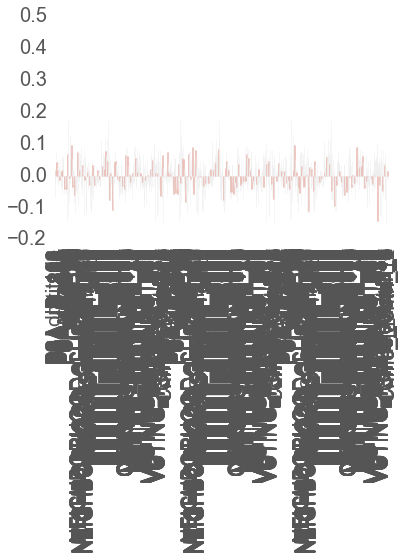

In [134]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=dc.columns)
weights.plot(kind='bar')
plt.show()

**For more improvement and guarding against overfitting:** At this point it would make sense to remove variables that are highly related to one another or ones that are irrelevant and keep going with the weights analysis. What variables would you remove?

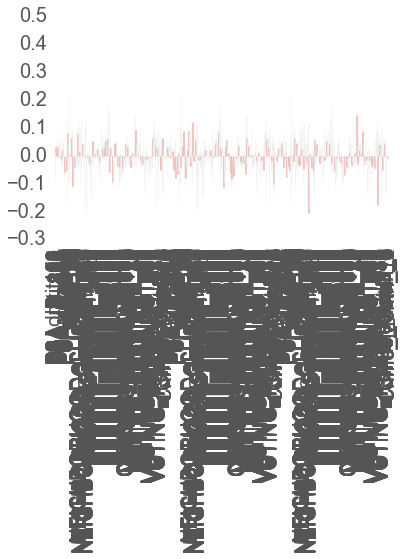

In [135]:
# you can also apply the StandardScaler function insied of the validation loop 
#  but this requires the use of PipeLines in scikit. Here is an example, but we will go over more 
#  thorough examples later in class

from sklearn.pipeline import Pipeline

std_scl = StandardScaler()
#lr_clf = LogisticRegression(penalty='l2', C=0.05) 

multi_class = 'multinomial' 
solver = 'lbfgs'
lr_clf = LogisticRegression(penalty='l2',  
                            multi_class=multi_class,
                            max_iter=200,
                            solver=solver) # get object

# create the pipline
piped_object = Pipeline([('scale', std_scl), ('logit_model', lr_clf)])

# run the pipline corssvalidated
for iter_num, (train_indices, test_indices) in enumerate(cv_object):
    piped_object.fit(X[train_indices],y[train_indices])  # train object
    
# it is a little odd getting trained objects from a  pipeline:
trained_model_from_pipeline = piped_object.named_steps['logit_model']

# now look at the weights
weights = pd.Series(trained_model_from_pipeline.coef_[0],index=dc.columns)
weights.plot(kind='bar')
plt.show()

### Since the last model did not live up to our expectations, we decided we want to see whether or not taking weather into account would influence the results. 

(The following code is identical to what is above, just with a different dataset.)

In [136]:
#1.0.1 - Import the libraries we will need
import pandas as pd
import numpy as np
import math

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(font_scale=2)
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

# Graph Lab Support
# import graphlab as gl
# import graphlab
# keep data visualizations within notebook
# graphlab.canvas.set_target('ipynb')

# Read in the crime data from the Lab 1 CSV file
dc = pd.read_csv('data/CrimeAndWeather.csv')

# *** TO DO:
#  * Incorporate a feature for the weather conditions during START_DATE and END_DATE so we can use rainfall/max temp/min temp in the regression
dc['REPORT_DAT'] = pd.to_datetime(dc['REPORT_DAT'])
dc=dc.rename(columns = {'REPORT_DAT':'REPORT_DATE'})
dc['START_DATE'] = pd.to_datetime(dc['START_DATE'])
dc['END_DATE'] = pd.to_datetime(dc['END_DATE'])
dc['XBLOCK'] = dc['XBLOCK'].astype(np.float64)
dc['YBLOCK'] = dc['YBLOCK'].astype(np.float64)
dc['PrecipitationIn'] = dc['PrecipitationIn'].astype(np.float64)
dc['Crime_Month'] = dc["START_DATE"].map(lambda x: x.month)

dc['Max TemperatureF']=dc['Max TemperatureF'].astype(np.int)
dc["Mean TemperatureF"]=dc["Mean TemperatureF"].astype(np.int)
dc["Min TemperatureF"]=dc["Min TemperatureF"].astype(np.int)
dc["Max Humidity"]=dc["Max Humidity"].astype(np.int)
dc[" Mean Humidity"]=dc[" Mean Humidity"].astype(np.int)
dc[" Min Humidity"]=dc[" Min Humidity"].astype(np.int)
dc[' Max Sea Level PressureIn']=dc[' Max Sea Level PressureIn'].astype(np.float64)
dc[" Mean Sea Level PressureIn"]=dc[" Mean Sea Level PressureIn"].astype(np.float64)
dc[" Min Sea Level PressureIn"]=dc[" Min Sea Level PressureIn"].astype(np.float64)
dc[" Max Wind SpeedMPH"]=dc[" Max Wind SpeedMPH"].astype(np.int)
dc[" Mean Wind SpeedMPH"]=dc[" Mean Wind SpeedMPH"].astype(np.int)
dc[" Max Gust SpeedMPH"]=dc[" Max Gust SpeedMPH"].astype(np.int)
dc[' CloudCover']=dc[' CloudCover'].astype(np.int)
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36345 entries, 0 to 36344
Data columns (total 50 columns):
REPORT_DATE                   36345 non-null datetime64[ns]
SHIFT                         36345 non-null object
OFFENSE                       36345 non-null object
METHOD                        36345 non-null object
DISTRICT                      36298 non-null float64
PSA                           36297 non-null float64
WARD                          36345 non-null int64
ANC                           36345 non-null int64
NEIGHBORHOOD_CLUSTER          36345 non-null int64
CENSUS_TRACT                  36345 non-null int64
VOTING_PRECINCT               36345 non-null int64
CCN                           36345 non-null int64
XBLOCK                        36345 non-null float64
YBLOCK                        36345 non-null float64
NewDate                       36345 non-null object
START_DATE                    36345 non-null datetime64[ns]
END_DATE                      36098 non-null 

In [137]:
# Dataset creation

#  The field "CRIME_TYPE" exists as 1 = Violent, and 2 = Property.  
#  We subtract from 2 to make it 1 = Violent, and 0 = Property
LRM_Response = 2 - dc["CRIME_TYPE"]
#print LRM_Response

#  What is the mean response
Mean_Response = LRM_Response.mean()
print "Mean response for the entire data set is " + str(Mean_Response)

Guess_Rate = 1.0 - Mean_Response
print "If we simply guessed 'Property' crime all the time, our accuracy would be " + str(Guess_Rate)

#  Set up model using all relevant features
LRM_Features = dc[["PSA_ID","WARD","ANC","NEIGHBORHOOD_CLUSTER","CENSUS_TRACT","VOTING_PRECINCT","SHIFT_Code","Latitude","Longitude","Crime_Month","Max TemperatureF","Mean TemperatureF","Min TemperatureF","Max Humidity"," Mean Humidity"," Min Humidity"," Max Sea Level PressureIn"," Mean Sea Level PressureIn"," Min Sea Level PressureIn"," Max Wind SpeedMPH"," Mean Wind SpeedMPH"," Max Gust SpeedMPH"," CloudCover","PrecipitationIn"]]
#print (LRM_Features)

#  Fit our model
LRM_Model = LogisticRegression()
LRM_Model = LRM_Model.fit(LRM_Features, LRM_Response)

#  How accurate is it?
Model_Acc = LRM_Model.score(LRM_Features, LRM_Response)
print "Accuracy of Logistic Regression model is " + str(Model_Acc)

if Model_Acc > Guess_Rate:
    print "The Logistic Regression model is better than simply guessing"
else:
    print "The Logistic Regression model is worse than simply guessing"


Mean response for the entire data set is 0.168881551795
If we simply guessed 'Property' crime all the time, our accuracy would be 0.831118448205
Accuracy of Logistic Regression model is 0.830678222589
The Logistic Regression model is worse than simply guessing


In [138]:
#  Display the coefficients to see if they tell us anything
pd.DataFrame(zip(LRM_Features.columns, np.transpose(LRM_Model.coef_)))

,0,1
0,PSA_ID,[0.00167520119619]
1,WARD,[0.0207465630608]
2,ANC,[0.00847878824674]
3,NEIGHBORHOOD_CLUSTER,[-0.00252053490874]
4,CENSUS_TRACT,[-5.25848685522e-06]
5,VOTING_PRECINCT,[0.00124115825988]
6,SHIFT_Code,[0.802869112857]
7,Latitude,[-0.0134617472584]
8,Longitude,[0.0413310495685]
9,Crime_Month,[-0.001555822579]


* The most significant factor is the SHIFT (i.e. the time of day)
* The second-most significant factor is Longitude, implying that as you move east, your chances of being involved in a violent crime increases
* The third-most significant factor is political WARD, so there are some Wards that are worse than others
* The fourth-most significant factor is Latitude, but negatively, so there is a greater chance of being involved in a violent crime as you move south

* Unfortunately the weather has little to no effect in terms of coefficients...

In [139]:
# Split the data into a training set and a test set (80/20)

LRM_XTrain, LRM_XTest, LRM_YTrain, LRM_YTest = train_test_split(LRM_Features, 
                                                                LRM_Response, 
                                                                test_size=0.2, 
                                                                random_state=0)

# Fit the same features against the training data
LRM_Model2 = LogisticRegression()
LRM_Model2.fit(LRM_XTrain, LRM_YTrain)

#  How accurate is it?
Model_Acc = LRM_Model2.score(LRM_Features, LRM_Response)
print "Accuracy of Logistic Regression model is " + str(Model_Acc)

if Model_Acc > Guess_Rate:
    print "The Logistic Regression model is better than simply guessing"
else:
    print "The Logistic Regression model is worse than simply guessing"


Accuracy of Logistic Regression model is 0.830568166185
The Logistic Regression model is worse than simply guessing


In [140]:
predicted = LRM_Model2.predict(LRM_XTest)
print predicted

# generate class probabilities
probs = LRM_Model2.predict_proba(LRM_XTest)
print probs

# generate evaluation metrics
print metrics.accuracy_score(LRM_YTest, predicted)
print metrics.roc_auc_score(LRM_YTest, probs[:, 1])

print metrics.confusion_matrix(LRM_YTest, predicted)
print metrics.classification_report(LRM_YTest, predicted)

[0 0 0 ..., 0 0 0]
[[ 0.8724528   0.1275472 ]
 [ 0.90138033  0.09861967]
 [ 0.95220124  0.04779876]
 ..., 
 [ 0.80176822  0.19823178]
 [ 0.95294887  0.04705113]
 [ 0.71233773  0.28766227]]
0.8281744394
0.719320136185
[[5919   87]
 [1162  101]]
             precision    recall  f1-score   support

          0       0.84      0.99      0.90      6006
          1       0.54      0.08      0.14      1263

avg / total       0.78      0.83      0.77      7269



In [141]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), 
                         LRM_Features,
                         LRM_Response, 
                         scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.83108666  0.83108666  0.83108666  0.83108666  0.83108666  0.83053645
  0.83108666  0.83048982  0.80071566  0.71208368]
0.816034555392


# Case 1a: Logistic Regression 

# Multi-variate Classification Analysis without Dummy Variables for the Input Categorical Variables

* **Python 2.7 skLearn Libraries**
* **Similar to the analysis done with Logistic Regression Model for Crime_Type**


In [142]:
# Dataset creation

#  The field "OFFENSE_Code" exists as 1 = XX, 2 = YY, ...... 9 = ZZ 
#  OFFENSE_Code is a Multi-Variate Classification 
#  LogisticRegression can handle multiple classes out-of-the-box.
#  http://stackoverflow.com/questions/36760000/python-how-to-use-multinomial-logistic-regression-using-sklearn
LRM_Response = dc["OFFENSE_Code"]
#print LRM_Response

my_custom_features = ["PSA_ID",
                      "WARD",
                      "ANC",
                      "NEIGHBORHOOD_CLUSTER",
                      "CENSUS_TRACT",
                      "VOTING_PRECINCT",
                      "SHIFT_Code",
                      "Crime_Month",
                      "DistrictID",
                      "Latitude",
                      "Longitude",
                      "Max TemperatureF",
                      "Mean TemperatureF",
                      "Min TemperatureF",
                      "Max Humidity",
                      " Mean Humidity",
                      " Min Humidity",
                      " Max Sea Level PressureIn",
                      " Mean Sea Level PressureIn",
                      " Min Sea Level PressureIn",
                      " Max Wind SpeedMPH",
                      " Mean Wind SpeedMPH",
                      " Max Gust SpeedMPH",
                      " CloudCover",
                      "PrecipitationIn"]

#  Set up model using all relevant features
LRM_Features = dc[my_custom_features]
#print LRM_Features

In [143]:
# flatten y into a 1-D array
#LRM_Response = np.ravel(LRM_Response)

# Logistic Regression

Let's go ahead and run logistic regression on the entire data set, and see how accurate it is!

In [144]:
# instantiate a logistic regression model, and fit with LRM_Features and LRM_Response
#  Fit our model
LRM_Model3 = LogisticRegression()
LRM_Model3 = LRM_Model3.fit(LRM_Features, LRM_Response)

# check the accuracy on the training set
LRM_Model3.score(LRM_Features, LRM_Response)

0.3899848672444628

In [145]:
# what percentage had OFFENSE_Code?
LRM_Response.mean()

2.4657587013344338

Let's examine the coefficients to see what we learn.

In [146]:
# examine the coefficients
pd.DataFrame(zip(LRM_Features.columns, np.transpose(LRM_Model.coef_)))

,0,1
0,PSA_ID,[0.00167520119619]
1,WARD,[0.0207465630608]
2,ANC,[0.00847878824674]
3,NEIGHBORHOOD_CLUSTER,[-0.00252053490874]
4,CENSUS_TRACT,[-5.25848685522e-06]
5,VOTING_PRECINCT,[0.00124115825988]
6,SHIFT_Code,[0.802869112857]
7,Crime_Month,[-0.0134617472584]
8,DistrictID,[0.0413310495685]
9,Latitude,[-0.001555822579]


# Each of the values listed in the table seems to be a vector of values

* The most significant factor is the CENSUS_TRACT (positive) 
* The second-most significant factor is SHIFT_Code (negative)
* The third-most significant factor is WARD (negative)
* The fourth-most significant factor is NEIGHBORHOOD_CLUSTER (negative)

In [147]:
# Split the data into a training set and a test set (80/20)

LRM_XTrain, LRM_XTest, LRM_YTrain, LRM_YTest = train_test_split(LRM_Features, 
                                                                LRM_Response, 
                                                                test_size=0.2, 
                                                                random_state=0)

# Fit the same features against the training data
LRM_Model4 = LogisticRegression()
LRM_Model4.fit(LRM_XTrain, LRM_YTrain)

#  How accurate is it?
Model_Acc = LRM_Model4.score(LRM_Features, LRM_Response)
print "Accuracy of Logistic Regression model is:\t{:04.2f}% ".format(Model_Acc*100)

Accuracy of Logistic Regression model is:	38.84% 


# Case 1b: Logistic Regression¶
Multi-variate Classification Analysis without Dummy Variables for the Input Categorical Variables

* **Python 2.7 skLearn Libraries**
* **Similar to the analysis done with Logistic Regression Model Dr. Eric Larson**

In [148]:
list(dc)

['REPORT_DATE',
 'SHIFT',
 'OFFENSE',
 'METHOD',
 'DISTRICT',
 'PSA',
 'WARD',
 'ANC',
 'NEIGHBORHOOD_CLUSTER',
 'CENSUS_TRACT',
 'VOTING_PRECINCT',
 'CCN',
 'XBLOCK',
 'YBLOCK',
 'NewDate',
 'START_DATE',
 'END_DATE',
 'PSA_ID',
 'DistrictID',
 'SHIFT_Code',
 'OFFENSE_Code',
 'METHOD_Code',
 'CRIME_TYPE',
 'AGE',
 'TIME_TO_REPORT',
 'Latitude',
 'Longitude',
 'Max TemperatureF',
 'Mean TemperatureF',
 'Min TemperatureF',
 'Max Dew PointF',
 'MeanDew PointF',
 'Min DewpointF',
 'Max Humidity',
 ' Mean Humidity',
 ' Min Humidity',
 ' Max Sea Level PressureIn',
 ' Mean Sea Level PressureIn',
 ' Min Sea Level PressureIn',
 ' Max VisibilityMiles',
 ' Mean VisibilityMiles',
 ' Min VisibilityMiles',
 ' Max Wind SpeedMPH',
 ' Mean Wind SpeedMPH',
 ' Max Gust SpeedMPH',
 'PrecipitationIn',
 ' CloudCover',
 ' Events',
 ' WindDirDegrees<br />',
 'Crime_Month']

In [149]:
misc_input_features = ['REPORT_DATE',
                 'SHIFT',
                 'METHOD',
                 'DISTRICT',
                 'PSA',
                 'CCN',
                 'XBLOCK',
                 'YBLOCK',
                 'START_DATE',
                 'END_DATE',
                 'AGE',
                 'TIME_TO_REPORT']

for feature in misc_input_features:
    if feature in dc:
        del dc[feature]
   
output_features = ['OFFENSE',
                  'METHOD_Code',
                  'CRIME_TYPE']

for feature in output_features:
    if feature in dc:
        del dc[feature]

In [150]:
list(dc)

['WARD',
 'ANC',
 'NEIGHBORHOOD_CLUSTER',
 'CENSUS_TRACT',
 'VOTING_PRECINCT',
 'NewDate',
 'PSA_ID',
 'DistrictID',
 'SHIFT_Code',
 'OFFENSE_Code',
 'Latitude',
 'Longitude',
 'Max TemperatureF',
 'Mean TemperatureF',
 'Min TemperatureF',
 'Max Dew PointF',
 'MeanDew PointF',
 'Min DewpointF',
 'Max Humidity',
 ' Mean Humidity',
 ' Min Humidity',
 ' Max Sea Level PressureIn',
 ' Mean Sea Level PressureIn',
 ' Min Sea Level PressureIn',
 ' Max VisibilityMiles',
 ' Mean VisibilityMiles',
 ' Min VisibilityMiles',
 ' Max Wind SpeedMPH',
 ' Mean Wind SpeedMPH',
 ' Max Gust SpeedMPH',
 'PrecipitationIn',
 ' CloudCover',
 ' Events',
 ' WindDirDegrees<br />',
 'Crime_Month']

# 5 - Modeling

<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
    <ol><li>[<b>50 points</b>] Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. Assess how well each model performs (use 80/20 training/testing split for your data). Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use.</li>
</ol>
</div>

## 5.1 Data Preparation
Our dataset must be prepared for `scikit-learn` library of classifiers.

### 5.1.1 Load Data

In [4]:
import pandas as pd
import numpy as np
from __future__ import print_function

# plotting stuff
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
sns.set(font_scale=1)
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

# Read in the crime data from the Lab 1 CSV file
dc = pd.read_csv('data/DC_Crime_2015_Lab1.csv')

In [5]:
# remind ourselves about the columns we have in this dataset
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36489 entries, 0 to 36488
Data columns (total 26 columns):
REPORT_DAT              36489 non-null object
SHIFT                   36489 non-null object
OFFENSE                 36489 non-null object
METHOD                  36489 non-null object
DISTRICT                36442 non-null float64
PSA                     36441 non-null float64
WARD                    36489 non-null int64
ANC                     36489 non-null int64
NEIGHBORHOOD_CLUSTER    36489 non-null int64
CENSUS_TRACT            36489 non-null int64
VOTING_PRECINCT         36489 non-null int64
CCN                     36489 non-null int64
XBLOCK                  36489 non-null float64
YBLOCK                  36489 non-null float64
START_DATE              36489 non-null object
END_DATE                36489 non-null object
PSA_ID                  36489 non-null int64
DistrictID              36489 non-null int64
SHIFT_Code              36489 non-null int64
OFFENSE_Code          

### 5.1.2 Break crime start date into usable values for prediction

In [6]:
# convert START_DATE to datetime
dc.START_DATE = pd.to_datetime(dc.START_DATE)

# add the month of the crime
dc['Crime_Start_Month'] = dc["START_DATE"].map(lambda x: x.month)
dc.Crime_Start_Month = dc.Crime_Start_Month.astype('int64')

# add day of the month
dc['Crime_Start_Day'] = dc["START_DATE"].map(lambda x:x.day)
dc.Crime_Start_Day = dc.Crime_Start_Day.astype('int64')

# add hour of the day
dc['Crime_Start_Hour'] = dc["START_DATE"].map(lambda x:x.hour)
dc.Crime_Start_Hour = dc.Crime_Start_Hour.astype('int64')

In [7]:
# printout offenses and codes for reference
print(dc.OFFENSE.unique())
print(dc.OFFENSE_Code.unique())

# printout crime type for reference - 1:violent, 2:property
print(dc.CRIME_TYPE.unique())

['THEFT/OTHER' 'THEFT F/AUTO' 'BURGLARY' 'ASSAULT W/DW' 'ROBBERY'
 'MOTOR VEHICLE THEFT' 'HOMICIDE' 'SEX ABUSE' 'ARSON']
[1 2 3 4 5 6 7 8 9]
[2 1]


### 5.1.3 Remove redundant features

In [8]:
# set new dataframe to use for classification; might need existing columns for later analysis
#df_classify = dc.copy()
df_classify = dc

# remove attributes that are redundant with other attributes
# most redundant because of Codes
# TIME_TO_REPORT is redundant with AGE
# XBLOCK and YBLOCK redundant with latitude and longitude
for attrib in ('OFFENSE', 'METHOD', 'DISTRICT', 'REPORT_DAT', 'CCN', 'START_DATE', 'END_DATE', 
               'SHIFT', 'PSA', 'TIME_TO_REPORT', 'XBLOCK', 'YBLOCK'):
    if attrib in df_classify:
        del df_classify[attrib]

### 5.1.4 Remove features we don't care about

In [9]:
# we are interested in police service area, remove all other geogrpahic features
for attrib in ('PSA_ID', 'ANC', 'NEIGHBORHOOD_CLUSTER', 'DistrictID', 'CENSUS_TRACT', 'VOTING_PRECINCT', 'AGE',
              'Crime_Start_Month', 'Crime_Start_Day'):
    if attrib in df_classify:
        del df_classify[attrib]

In [10]:
df_classify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36489 entries, 0 to 36488
Data columns (total 8 columns):
WARD                36489 non-null int64
SHIFT_Code          36489 non-null int64
OFFENSE_Code        36489 non-null int64
METHOD_Code         36489 non-null int64
CRIME_TYPE          36489 non-null int64
Latitude            36489 non-null float64
Longitude           36489 non-null float64
Crime_Start_Hour    36489 non-null int64
dtypes: float64(2), int64(6)
memory usage: 2.2 MB


### 5.1.5 Break categories into separate columns for each possible outcome.

In [11]:
# perform one-hot encoding of non-binary categorical data

for attrib in ('SHIFT_Code', 'METHOD_Code', 'WARD'):
    tmp_df = pd.get_dummies(df_classify[attrib], prefix=attrib)
    df_classify = pd.concat((df_classify, tmp_df),axis=1) # add back into the dataframe
    
    del df_classify[attrib] # remove attribe

print(df_classify.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36489 entries, 0 to 36488
Data columns (total 19 columns):
OFFENSE_Code        36489 non-null int64
CRIME_TYPE          36489 non-null int64
Latitude            36489 non-null float64
Longitude           36489 non-null float64
Crime_Start_Hour    36489 non-null int64
SHIFT_Code_1        36489 non-null float64
SHIFT_Code_2        36489 non-null float64
SHIFT_Code_3        36489 non-null float64
METHOD_Code_1       36489 non-null float64
METHOD_Code_2       36489 non-null float64
METHOD_Code_3       36489 non-null float64
WARD_1              36489 non-null float64
WARD_2              36489 non-null float64
WARD_3              36489 non-null float64
WARD_4              36489 non-null float64
WARD_5              36489 non-null float64
WARD_6              36489 non-null float64
WARD_7              36489 non-null float64
WARD_8              36489 non-null float64
dtypes: float64(16), int64(3)
memory usage: 5.3 MB
None


## 5.2 - Dataset Review
### 5.2.1 Now it is time to review our data before modeling it. We will begin by displaying simple statistics of our columns.

In [12]:
df_classify.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
OFFENSE_Code,36489.0,2.468634,1.717339,1.000000,1.00000,2.000000,3.000000,9.000000
CRIME_TYPE,36489.0,1.830826,0.374911,1.000000,2.00000,2.000000,2.000000,2.000000
Latitude,36489.0,38.907139,0.030849,38.813471,38.89208,38.906455,38.926422,38.993560
Longitude,36489.0,-77.008059,0.035893,-77.113642,-77.03196,-77.012929,-76.985512,-76.910021
Crime_Start_Hour,36489.0,13.517526,6.394569,0.000000,9.00000,14.000000,19.000000,23.000000
SHIFT_Code_1,36489.0,0.372140,0.483382,0.000000,0.00000,0.000000,1.000000,1.000000
SHIFT_Code_2,36489.0,0.437885,0.496134,0.000000,0.00000,0.000000,1.000000,1.000000
SHIFT_Code_3,36489.0,0.189975,0.392287,0.000000,0.00000,0.000000,0.000000,1.000000
METHOD_Code_1,36489.0,0.908356,0.288527,0.000000,1.00000,1.000000,1.000000,1.000000
METHOD_Code_2,36489.0,0.059717,0.236964,0.000000,0.00000,0.000000,0.000000,1.000000


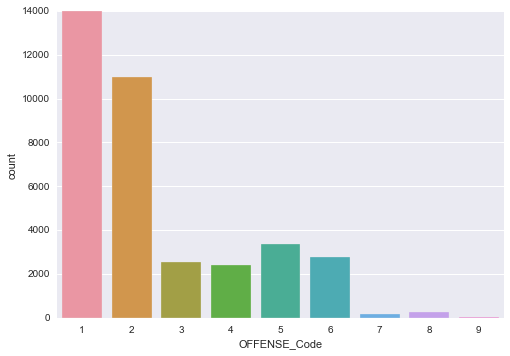

In [13]:
# 1: Theft/Other, 2: Theft from Auto, 3: Burglary, 4: Assault with Dangerous Weapon,
# 5: Robbery, 6: Motor Vehicle Theft, 7: Homicide, 8: Sex Abuse, 9: Arson

tmpdf = df_classify[['OFFENSE_Code']]
sns.countplot(x='OFFENSE_Code', data=tmpdf)

Offence Code 1 or Theft/Other is 38% of our population. We are imbalanced with offense code 1 and 2.

In [14]:
df_classify.OFFENSE_Code.value_counts() / len(df_classify.OFFENSE_Code) * 1.

1    0.383677
2    0.300639
5    0.091863
6    0.076571
3    0.069446
4    0.065499
8    0.007482
7    0.004330
9    0.000493
Name: OFFENSE_Code, dtype: float64

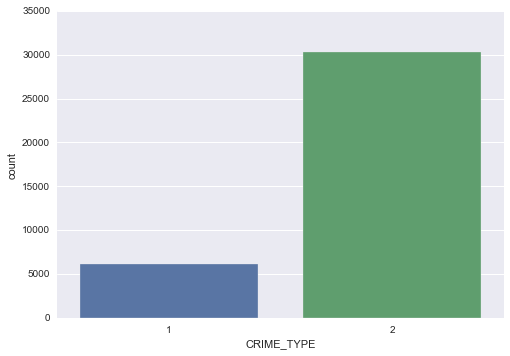

In [15]:
# 1: violent, 2: propery

tmpdf = df_classify[['CRIME_TYPE']]
sns.countplot(x='CRIME_TYPE', data=tmpdf)

Property crime type is 83% of our population. This means we have an imbalanced class data.

In [16]:
df_classify.CRIME_TYPE.value_counts() / len(df_classify.CRIME_TYPE) * 1.

2    0.830826
1    0.169174
Name: CRIME_TYPE, dtype: float64

## 5.3 - Training and Testing Split

For training and testing purposes, let's gather the data we have and grab 80% of the instances for training and the remaining 20% for testing. Moreover, let's repeat this process of separating the testing and training data three times. We will use the hold out cross validation method built into `scikit-learn`.

In [17]:
crime_type_target = 'CRIME_TYPE'
offense_code_target = 'OFFENSE_Code'

features = df_classify.columns.values
features = features[(features != 'CRIME_TYPE') & (features != 'OFFENSE_Code')]
print('number of features =', len(features))

y_crime_type = df_classify[crime_type_target].values
y_offense_code = df_classify[offense_code_target].values

X = df_classify[features].values
print(X.shape)

number of features = 17
(36489L, 17L)


In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
    
    
# to use the cross validation object in scikit-learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
cv_object = StratifiedShuffleSplit(n_splits=3, test_size=0.2)
print(cv_object)

StratifiedShuffleSplit(n_splits=3, random_state=None, test_size=0.2,
            train_size=None)


## 5.4 Normalization

In [19]:
# let's normalize our data
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , X_test

for train_indices, test_indices in cv_object.split(X, y_crime_type):
    X_train = X[train_indices]

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_norm = scl_obj.transform(X)

In [20]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## 5.5 Logistic Regression

### 5.5.1 Crime Type Classification

In [21]:
# http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
C_range = np.logspace(-2, 3, 4)
param_grid = dict(C=C_range)
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

grid = GridSearchCV(LogisticRegression(penalty='l2', class_weight='balanced', multi_class='ovr', n_jobs=-1), 
                    param_grid=param_grid, cv=cv)
grid.fit(X_norm, y_crime_type)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 0.01} with a score of 0.85


In [22]:
# use best model and report
lgr = LogisticRegression(penalty='l2', class_weight='balanced', multi_class='ovr', n_jobs=-1, C=.01)
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

iter_num = 0
for train_indices, test_indices in cv.split(X_norm, y_crime_type):
    %timeit lgr.fit(X_norm[train_indices], y_crime_type[train_indices])  # train object
    y_hat = lgr.predict(X_norm[test_indices]) # get test set predictions
    
    iter_num = iter_num + 1
    print('Iteration: ', iter_num)
    print(accuracy_score(y_crime_type[test_indices], y_hat))
    print(classification_report(y_crime_type[test_indices], y_hat))

10 loops, best of 3: 124 ms per loop
Iteration:  1
0.853795560428
             precision    recall  f1-score   support

          1       0.56      0.66      0.60      1235
          2       0.93      0.89      0.91      6063

avg / total       0.87      0.85      0.86      7298

10 loops, best of 3: 116 ms per loop
Iteration:  2
0.857495204166
             precision    recall  f1-score   support

          1       0.57      0.63      0.60      1235
          2       0.92      0.90      0.91      6063

avg / total       0.86      0.86      0.86      7298

10 loops, best of 3: 127 ms per loop
Iteration:  3
0.842011510003
             precision    recall  f1-score   support

          1       0.53      0.65      0.58      1235
          2       0.93      0.88      0.90      6063

avg / total       0.86      0.84      0.85      7298



Coefficients

In [23]:
# sort these attributes and spit them out
zip_vars = zip(lgr.coef_.T, features) # combine attributes
zip_vars.sort(key = lambda t: np.abs(t[0]), reverse=True) # sort them by the magnitude of the weight
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

METHOD_Code_1 has weight of 0.810679130962
METHOD_Code_2 has weight of -0.620086108262
METHOD_Code_3 has weight of -0.494606828858
SHIFT_Code_3 has weight of -0.331927427667
SHIFT_Code_1 has weight of 0.308913161993
WARD_2 has weight of 0.179805533072
WARD_3 has weight of 0.17462480449
WARD_4 has weight of -0.100956821017
WARD_8 has weight of -0.089624317926
Longitude has weight of -0.0824036099758
WARD_7 has weight of -0.0800974604686
Latitude has weight of 0.0640115585074
WARD_1 has weight of -0.0395200309025
SHIFT_Code_2 has weight of -0.0385540732064
WARD_5 has weight of -0.0260190872617
Crime_Start_Hour has weight of 0.0155813289389
WARD_6 has weight of -0.00326173935789


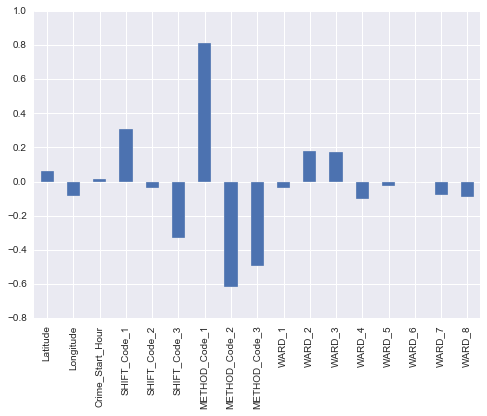

In [24]:
# now let's make a pandas Series with the names and values, and plot them
weights = pd.Series(lgr.coef_[0], index=features)
#sns.barplot(y=weights, x=weights.index, data=weights)
weights.plot(kind='bar')
#plt.xlabel('features', fontsize=5)
plt.show()

# method_code = 'others':1, 'gun':2, 'knife':3

### 5.5.2 Offense Codes Classification

In [25]:
# use best model and report
lgr = LogisticRegression(penalty='l2', class_weight='balanced', multi_class='multinomial',
                                      solver='sag', n_jobs=-1, C=100, max_iter=500)
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

iter_num = 0
for train_indices, test_indices in cv.split(X_norm, y_offense_code):
    %timeit lgr.fit(X_norm[train_indices], y_offense_code[train_indices])  # train object
    y_hat = lgr.predict(X_norm[test_indices]) # get test set predictions
    
    iter_num = iter_num + 1
    print('Iteration: ', iter_num)
    print(accuracy_score(y_offense_code[test_indices], y_hat))
    print(classification_report(y_offense_code[test_indices], y_hat))

C:\Users\austi\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


1 loop, best of 3: 15.1 s per loop
Iteration:  1
0.159632776103
             precision    recall  f1-score   support

          1       0.44      0.09      0.15      2800
          2       0.46      0.20      0.28      2194
          3       0.07      0.19      0.10       507
          4       0.41      0.47      0.44       478
          5       0.06      0.12      0.08       670
          6       0.07      0.08      0.07       559
          7       0.05      0.84      0.09        32
          8       0.01      0.22      0.02        55
          9       0.00      0.00      0.00         3

avg / total       0.35      0.16      0.19      7298

1 loop, best of 3: 15 s per loop
Iteration:  2
0.237325294601
             precision    recall  f1-score   support

          1       0.52      0.31      0.39      2800
          2       0.41      0.16      0.23      2194
          3       0.09      0.21      0.12       507
          4       0.25      0.40      0.31       478
          5       0.45

## 5.6 Support Vector Machine (SVM) Regression

In [27]:
# run logistic regression and vary some parameters
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

### 5.6.1 Crime Type Classification

In [28]:
C_range = np.logspace(-2, 3, 4)
param_grid = dict(C=C_range)

cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
grid = GridSearchCV(LinearSVC(penalty='l2', multi_class='ovr', class_weight='balanced', dual=True), 
                    param_grid=param_grid, cv=cv, n_jobs=-1)
grid.fit(X_norm, y_crime_type)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 21.544346900318846} with a score of 0.90


In [29]:
# use best model and report
svm = LinearSVC(penalty='l2', class_weight='balanced', dual=True, multi_class='ovr', C=21.5)
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

iter_num = 0
for train_indices, test_indices in cv.split(X_norm, y_crime_type):
    %timeit svm.fit(X_norm[train_indices], y_crime_type[train_indices])  # train object
    y_hat = svm.predict(X_norm[test_indices]) # get test set precitions
    
    iter_num = iter_num + 1
    print('Iteration: ', iter_num)
    print(accuracy_score(y_crime_type[test_indices], y_hat))
    print(classification_report(y_crime_type[test_indices], y_hat))

1 loop, best of 3: 4.09 s per loop
Iteration:  1
0.914360098657
             precision    recall  f1-score   support

          1       0.90      0.55      0.69      1235
          2       0.92      0.99      0.95      6063

avg / total       0.91      0.91      0.91      7298

1 loop, best of 3: 4.13 s per loop
Iteration:  2
0.803096738833
             precision    recall  f1-score   support

          1       0.45      0.71      0.55      1235
          2       0.93      0.82      0.87      6063

avg / total       0.85      0.80      0.82      7298

1 loop, best of 3: 4.14 s per loop
Iteration:  3
0.916689503974
             precision    recall  f1-score   support

          1       0.96      0.53      0.68      1235
          2       0.91      1.00      0.95      6063

avg / total       0.92      0.92      0.91      7298



[[ 0.08227237  0.08446057 -0.12684971  0.06463312  0.03191194 -0.12006285
   0.23226594 -0.14169395 -0.19033895  0.01061978  0.0624912  -0.01724651
  -0.0262329  -0.02204086  0.02290167 -0.06493073  0.01300135]]


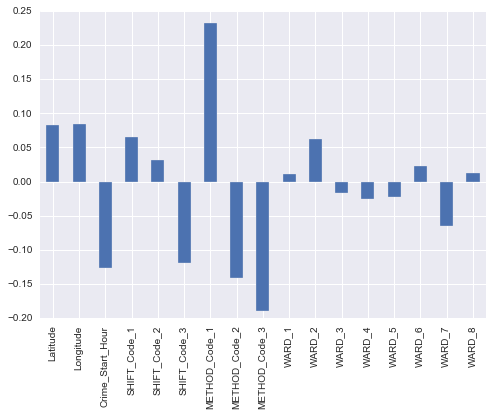

In [31]:
print(svm.coef_)
weights = pd.Series(svm.coef_[0],index=features)
weights.plot(kind='bar')

### LinearSVC doesn't provide access to support vectors. Therefore, we use SVC algorithm to get the appropriate result attribute.

In [32]:
# use best model and report
svm = SVC(kernel='linear', gamma='auto', cache_size=2000, class_weight='balanced', 
          decision_function_shape='ovr', C=21.5, max_iter=500, shrinking=True)
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

iter_num = 0
for train_indices, test_indices in cv.split(X_norm, y_crime_type):
    %timeit svm.fit(X_norm[train_indices], y_crime_type[train_indices])  # train object
    y_hat = svm.predict(X_norm[test_indices]) # get test set precitions
    
    iter_num = iter_num + 1
    print('Iteration: ', iter_num)
    print(accuracy_score(y_crime_type[test_indices], y_hat))
    print(classification_report(y_crime_type[test_indices], y_hat))

C:\Users\austi\Anaconda2\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


1 loop, best of 3: 315 ms per loop
Iteration:  1
0.755960537133
             precision    recall  f1-score   support

          1       0.35      0.53      0.43      1235
          2       0.89      0.80      0.85      6063

avg / total       0.80      0.76      0.77      7298

1 loop, best of 3: 357 ms per loop
Iteration:  2
0.459577966566
             precision    recall  f1-score   support

          1       0.18      0.62      0.28      1235
          2       0.85      0.43      0.57      6063

avg / total       0.73      0.46      0.52      7298

1 loop, best of 3: 279 ms per loop
Iteration:  3
0.614551932036
             precision    recall  f1-score   support

          1       0.24      0.61      0.35      1235
          2       0.89      0.62      0.73      6063

avg / total       0.78      0.61      0.66      7298



In [33]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = df_classify.iloc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm.support_,:]

df_support['Crime_Type'] = y_crime_type[svm.support_] # add back in the 'Survived' Column to the pandas dataframe
df_classify['Crime_Type'] = y_crime_type # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 32509 to 32656
Data columns (total 20 columns):
OFFENSE_Code        463 non-null int64
CRIME_TYPE          463 non-null int64
Latitude            463 non-null float64
Longitude           463 non-null float64
Crime_Start_Hour    463 non-null int64
SHIFT_Code_1        463 non-null float64
SHIFT_Code_2        463 non-null float64
SHIFT_Code_3        463 non-null float64
METHOD_Code_1       463 non-null float64
METHOD_Code_2       463 non-null float64
METHOD_Code_3       463 non-null float64
WARD_1              463 non-null float64
WARD_2              463 non-null float64
WARD_3              463 non-null float64
WARD_4              463 non-null float64
WARD_5              463 non-null float64
WARD_6              463 non-null float64
WARD_7              463 non-null float64
WARD_8              463 non-null float64
Crime_Type          463 non-null int64
dtypes: float64(16), int64(4)
memory usage: 76.0 KB


C:\Users\austi\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


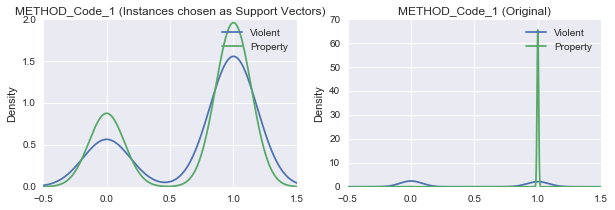

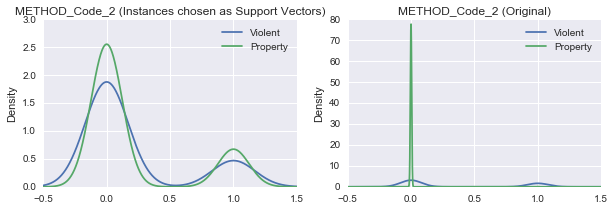

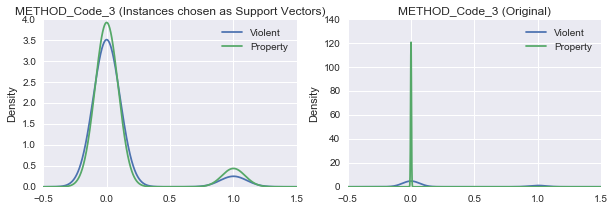

In [34]:
# now lets see the statistics of these attributes
from pandas.tools.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['Crime_Type'])
df_grouped = df_classify.groupby(['Crime_Type'])

# plot KDE of Different variables
vars_to_plot = ['METHOD_Code_1', 'METHOD_Code_2', 'METHOD_Code_3']

for v in vars_to_plot:
    plt.figure(figsize=(10,3))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Violent','Property'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Violent','Property'])
    plt.title(v+' (Original)')

### 5.6.2 Offense Code Classification

In [35]:
# use best model and report
svm = LinearSVC(penalty='l2', class_weight='balanced', dual=True, multi_class='ovr', C=21.5)
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

iter_num = 0
for train_indices, test_indices in cv_object.split(X_norm, y_offense_code):
    %timeit svm.fit(X_norm[train_indices], y_crime_type[train_indices])  # train object
    y_hat = svm.predict(X_norm[test_indices]) # get test set precitions
    
    iter_num = iter_num +1
    print('Iteration: ', iter_num)
    print(accuracy_score(y_offense_code[test_indices], y_hat))
    print(classification_report(y_offense_code[test_indices], y_hat))

1 loop, best of 3: 4.39 s per loop
Iteration:  1
0.301178405042
             precision    recall  f1-score   support

          1       0.01      0.00      0.00      2800
          2       0.33      1.00      0.50      2194
          3       0.00      0.00      0.00       507
          4       0.00      0.00      0.00       478
          5       0.00      0.00      0.00       670
          6       0.00      0.00      0.00       559
          7       0.00      0.00      0.00        32
          8       0.00      0.00      0.00        55
          9       0.00      0.00      0.00         3

avg / total       0.10      0.30      0.15      7298



C:\Users\austi\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1 loop, best of 3: 4.11 s per loop
Iteration:  2
0.300630309674
             precision    recall  f1-score   support

          1       0.00      0.00      0.00      2800
          2       0.33      1.00      0.50      2194
          3       0.00      0.00      0.00       507
          4       0.00      0.00      0.00       478
          5       0.00      0.00      0.00       670
          6       0.00      0.00      0.00       559
          7       0.00      0.00      0.00        32
          8       0.00      0.00      0.00        55
          9       0.00      0.00      0.00         3

avg / total       0.10      0.30      0.15      7298

1 loop, best of 3: 4.12 s per loop
Iteration:  3
0.3010413812
             precision    recall  f1-score   support

          1       0.01      0.00      0.00      2800
          2       0.33      1.00      0.50      2194
          3       0.00      0.00      0.00       507
          4       0.00      0.00      0.00       478
          5       0.00

[[-0.02571108 -0.05256411  0.05783669  0.0556085   0.01191831 -0.08362713
   0.23064745 -0.18396636 -0.13051972  0.00134627  0.02843102  0.07086244
   0.05275297 -0.06946405  0.00382364 -0.00406659 -0.05976922]]


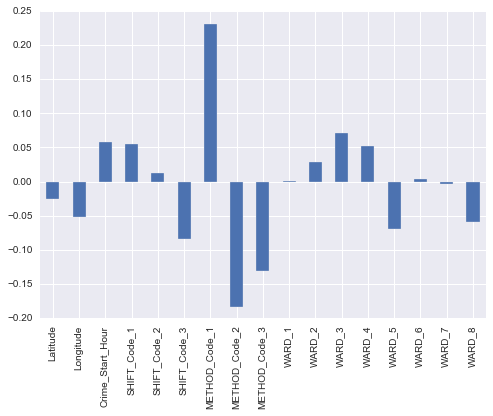

In [37]:
print(svm.coef_)
weights = pd.Series(svm.coef_[0],index=features)
weights.plot(kind='bar')

# 6 - Discuss advanges of each model for each classification task.

<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
    <ol><li>[<b>10 points</b>]  Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail.</li>
</ol>
</div>

## 6.1 Advantages of Logistic Regression

## 6.2 Advantages and Disadvantages of Support Vector Machine (SVM)

An advantage of SVM is that they are effective in high dimensional space where features outnumber samples. It uses a subset of training points (support vectors) in the decision function making them memory efficient. In addition, different kernel functions may be specified for the decision function. `scikit-learn` provides three kernels with its SVC algorithm.

SVC supports three kernel functions; i.e., linear, polynomial, and radial. Examples of these three kernel functions and the boundaries they produced are shown below. This flexibility allows the data scientist to better tune the model to the problem.

In addition, over-fitting is not common with SVM. A cost control parameter is provided allowing the modeler to indicate how outlier data should be penalized and thereby effecting the decision function margin. In addition, a gamma parameter is provided allowing the modeler to control the curvature of the hyperplane. 

It works well with fewer training samples. Its prediction accuracy is generally high. Once the model it fit or learned, the evaluation of new data is fast.

![SVM Kernels](images/svm_kernels.png "SVM Kernels")

A main disadvantage of SVM is the quadratic requirement in compute and storage in large-scale tasks, see below for more details. This makes training a SVM painful. Another disadvantage is the time it takes to determine the optimal settings like kernel function. The weights can be difficult to understand.


## 6.3 Performance

`scikit-learn's` Linear SVC algorithm used to classify CRIME_TYPE provided an improved accuracy of 6% over Logistic Regression algorithm, 91% accuracy versus 85%. But, the Logistic Regression algorithm was able to fit or train a model 34.6 times faster than Linear SVC (4.12s / 119 ms). While this difference is substantial, it is much better than the generic SVC algorithm. 

`scikit-learn's` generic SVC algorithm is based a different underlying C SVM engine. Its engine requires increasingly (quadratic) more compute and storage requirements as the number of training vectors grow. Linear SVC underlying C SVM engine is more efficient and can scale to millions of samples and/or features. 

# 7 - Interpret the weights

<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
    <ol>
    <li>[<b>30 points</b>] Use the weights from logistic regression to interpret the importance of different features for each classification task. Explain your interpretation in detail. Why do you think some variables are more important?</li>
</ol>
</div>

# 8 - Analyze the support vectors

<div style='margin-left:10%;margin-right:10%;margin-top:15px;background-color:#d3d3d3;padding:10px;'>
    <ol>
    <li>[<b>10 points</b>]  Look at the chosen support vectors for the classification task. Do these provide
any insight into the data? Explain.</li>
</ol>
</div>

# Appendix